In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  
  if (len(x)>1):
    
    plt.legend()
    plt.grid()
  
  fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation



In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

<h3>Architecture 1: 784-501-101-10</h3>

<h3>__ Model 1: sigmoid activation + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers.normalization import BatchNormalization

model_1 = Sequential()

model_1.add(Dense(501, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model_1.add(Dense(101, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)) )

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 501)               393285    
_________________________________________________________________
dense_40 (Dense)             (None, 101)               50702     
_________________________________________________________________
dense_41 (Dense)             (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.5731 - acc: 0.8503 - val_loss: 0.2581 - val_acc: 0.9268
Epoch 2/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.2244 - acc: 0.9342 - val_loss: 0.1858 - val_acc: 0.9430
Epoch 3/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.1649 - acc: 0.9518 - val_loss: 0.1501 - val_acc: 0.9557
Epoch 4/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.1280 - acc: 0.9623 - val_loss: 0.1185 - val_acc: 0.9635
Epoch 5/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.1001 - acc: 0.9701 - val_loss: 0.1010 - val_acc: 0.9683
Epoch 6/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0792 - acc: 0.9767 - val_loss: 0.0888 - val_acc: 0.9726
Epoch 7/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0640 - acc: 0.9817 - val_loss: 0.0837 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.06872767313871009
Test accuracy: 0.9819


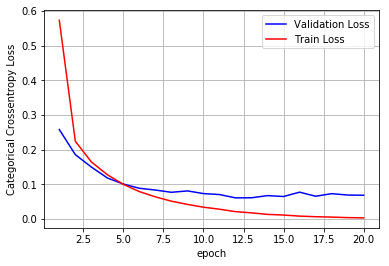

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


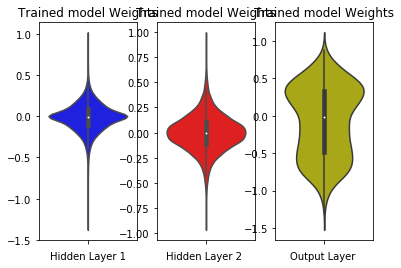

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 1 : sigmoid activation + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model_1.add(Dense(101, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 501)               393285    
_________________________________________________________________
dense_43 (Dense)             (None, 101)               50702     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 97us/step - loss: 2.2664 - acc: 0.2363 - val_loss: 2.2134 - val_acc: 0.4085
Epoch 2/20
60000/60000 [==============================] - 5s 79us/step - loss: 2.1629 - acc: 0.4781 - val_loss: 2.0989 - val_acc: 0.5886
Epoch 3/20
60000/60000 [==============================] - 5s 79us/step - loss: 2.0294 - acc: 0.5880 - val_loss: 1.9394 - val_acc: 0.6175
Epoch 4/20
60000/60000 [==============================] - 5s 78us/step - loss: 1.8462 - acc: 0.6396 - val_loss: 1.7281 - val_acc: 0.6675
Epoch 5/20
60000/60000 [==============================] - 5s 77us/step - loss: 1.6229 - acc: 0.6761 - val_loss: 1.4950 - val_acc: 0.6982
Epoch 6/20
60000/60000 [==============================] - 5s 78us/step - loss: 1.3977 - acc: 0.7100 - val_loss: 1.2798 - val_acc: 0.7339
Epoch 7/20
60000/60000 [==============================] - 5s 78us/step - loss: 1.2064 - acc: 0.7401 - val_loss: 1.1102 - val_acc

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.46927674760818483
Test accuracy: 0.8768


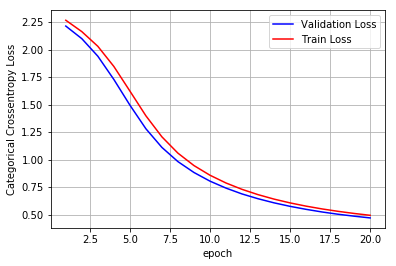

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


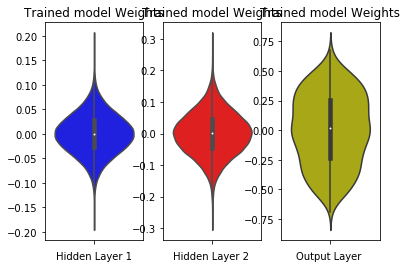

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 1 : sigmoid activation + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))

model_1.add(Dense(101, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.140, seed=None)) )

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 501)               393285    
_________________________________________________________________
dense_46 (Dense)             (None, 101)               50702     
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.5234 - acc: 0.8697 - val_loss: 0.2584 - val_acc: 0.9266
Epoch 2/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2225 - acc: 0.9363 - val_loss: 0.1880 - val_acc: 0.9440
Epoch 3/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.1650 - acc: 0.9521 - val_loss: 0.1452 - val_acc: 0.9572
Epoch 4/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.1272 - acc: 0.9630 - val_loss: 0.1232 - val_acc: 0.9635
Epoch 5/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.1011 - acc: 0.9708 - val_loss: 0.1056 - val_acc: 0.9670
Epoch 6/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0813 - acc: 0.9763 - val_loss: 0.0934 - val_acc: 0.9710
Epoch 7/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0666 - acc: 0.9807 - val_loss: 0.0847 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.07310124088092998
Test accuracy: 0.9789


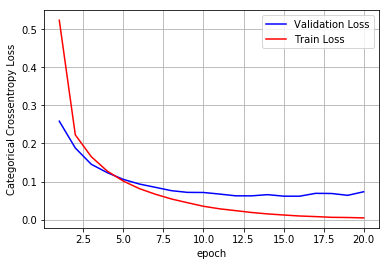

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


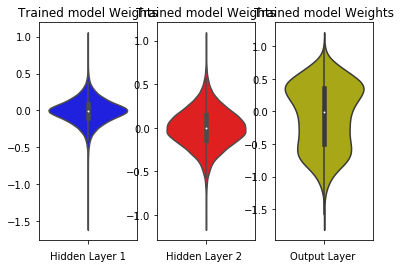

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 1 : sigmoid activation + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))

model_1.add(Dense(101, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.140, seed=None)) )

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 501)               393285    
_________________________________________________________________
dense_49 (Dense)             (None, 101)               50702     
_________________________________________________________________
dense_50 (Dense)             (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 94us/step - loss: 2.1894 - acc: 0.3638 - val_loss: 2.0313 - val_acc: 0.5796
Epoch 2/20
60000/60000 [==============================] - 5s 76us/step - loss: 1.8673 - acc: 0.6337 - val_loss: 1.6789 - val_acc: 0.6953
Epoch 3/20
60000/60000 [==============================] - 5s 76us/step - loss: 1.5238 - acc: 0.7151 - val_loss: 1.3500 - val_acc: 0.7514
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 1.2344 - acc: 0.7643 - val_loss: 1.0986 - val_acc: 0.7842
Epoch 5/20
60000/60000 [==============================] - 5s 76us/step - loss: 1.0214 - acc: 0.7951 - val_loss: 0.9202 - val_acc: 0.8119
Epoch 6/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.8719 - acc: 0.8154 - val_loss: 0.7958 - val_acc: 0.8317
Epoch 7/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.7667 - acc: 0.8307 - val_loss: 0.7073 - val_acc

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.3833876079082489
Test accuracy: 0.8999


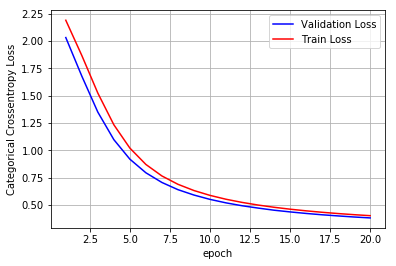

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


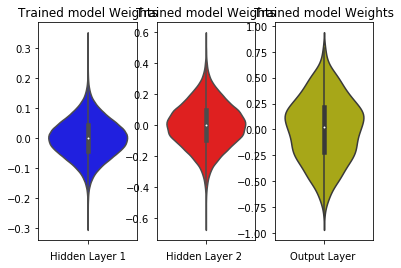

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>__ Model 2: Relu activation + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers.normalization import BatchNormalization

model_1 = Sequential()

model_1.add(Dense(501, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model_1.add(Dense(101, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)) )

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 501)               393285    
_________________________________________________________________
dense_52 (Dense)             (None, 101)               50702     
_________________________________________________________________
dense_53 (Dense)             (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.2441 - acc: 0.9291 - val_loss: 0.1240 - val_acc: 0.9609
Epoch 2/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0924 - acc: 0.9717 - val_loss: 0.0817 - val_acc: 0.9731
Epoch 3/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0573 - acc: 0.9825 - val_loss: 0.0696 - val_acc: 0.9773
Epoch 4/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0404 - acc: 0.9875 - val_loss: 0.0767 - val_acc: 0.9774
Epoch 5/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0288 - acc: 0.9911 - val_loss: 0.0624 - val_acc: 0.9805
Epoch 6/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0224 - acc: 0.9931 - val_loss: 0.0759 - val_acc: 0.9774
Epoch 7/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0180 - acc: 0.9943 - val_loss: 0.0637 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.08829486077914112
Test accuracy: 0.9809


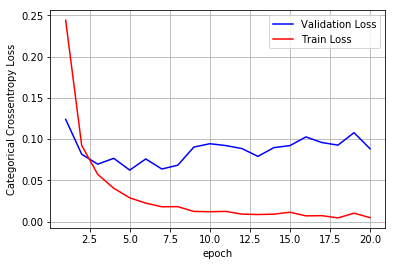

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


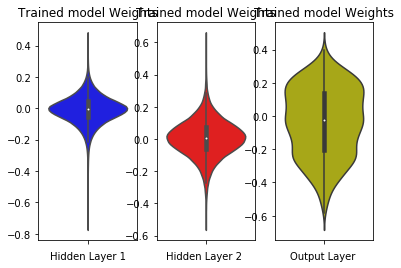

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 2 : relu activation + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model_1.add(Dense(101, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 501)               393285    
_________________________________________________________________
dense_55 (Dense)             (None, 101)               50702     
_________________________________________________________________
dense_56 (Dense)             (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 1.0661 - acc: 0.7526 - val_loss: 0.5005 - val_acc: 0.8796
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.4386 - acc: 0.8856 - val_loss: 0.3621 - val_acc: 0.9055
Epoch 3/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3539 - acc: 0.9021 - val_loss: 0.3150 - val_acc: 0.9128
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3152 - acc: 0.9108 - val_loss: 0.2869 - val_acc: 0.9207
Epoch 5/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2892 - acc: 0.9177 - val_loss: 0.2665 - val_acc: 0.9251
Epoch 6/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2693 - acc: 0.9234 - val_loss: 0.2515 - val_acc: 0.9314
Epoch 7/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2530 - acc: 0.9290 - val_loss: 0.2383 - val_acc

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.1468325086183846
Test accuracy: 0.9582


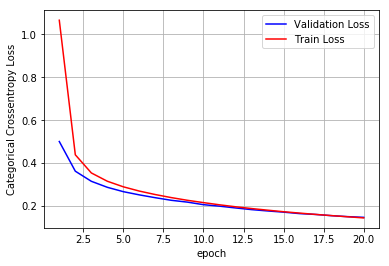

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


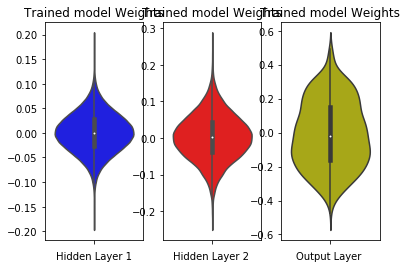

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 1 : relu activation + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))

model_1.add(Dense(101, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.140, seed=None)) )

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 501)               393285    
_________________________________________________________________
dense_58 (Dense)             (None, 101)               50702     
_________________________________________________________________
dense_59 (Dense)             (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.2340 - acc: 0.9307 - val_loss: 0.1266 - val_acc: 0.9616
Epoch 2/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0861 - acc: 0.9731 - val_loss: 0.0919 - val_acc: 0.9714
Epoch 3/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0558 - acc: 0.9829 - val_loss: 0.0902 - val_acc: 0.9738
Epoch 4/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0381 - acc: 0.9879 - val_loss: 0.0781 - val_acc: 0.9775
Epoch 5/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0285 - acc: 0.9910 - val_loss: 0.0801 - val_acc: 0.9761
Epoch 6/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0202 - acc: 0.9939 - val_loss: 0.0715 - val_acc: 0.9794
Epoch 7/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0188 - acc: 0.9941 - val_loss: 0.0694 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09668173986358906
Test accuracy: 0.9806


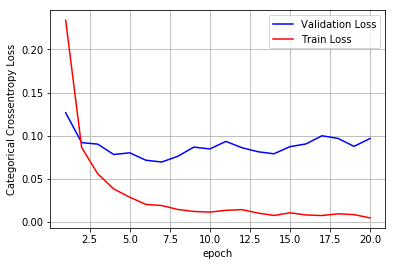

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


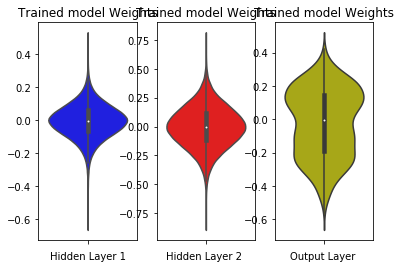

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 2 : relu activation + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))

model_1.add(Dense(101, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.140, seed=None)) )

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 501)               393285    
_________________________________________________________________
dense_61 (Dense)             (None, 101)               50702     
_________________________________________________________________
dense_62 (Dense)             (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.7519 - acc: 0.7855 - val_loss: 0.3920 - val_acc: 0.8908
Epoch 2/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.3539 - acc: 0.9000 - val_loss: 0.3049 - val_acc: 0.9140
Epoch 3/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2910 - acc: 0.9184 - val_loss: 0.2666 - val_acc: 0.9249
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2567 - acc: 0.9271 - val_loss: 0.2401 - val_acc: 0.9311
Epoch 5/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2324 - acc: 0.9335 - val_loss: 0.2226 - val_acc: 0.9358
Epoch 6/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2142 - acc: 0.9392 - val_loss: 0.2076 - val_acc: 0.9399
Epoch 7/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.1994 - acc: 0.9431 - val_loss: 0.1955 - val_acc

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.12461129240207375
Test accuracy: 0.9635


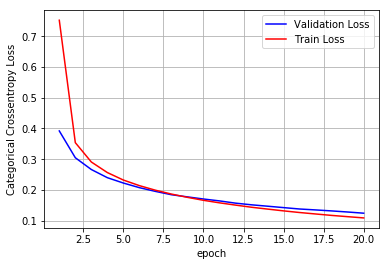

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


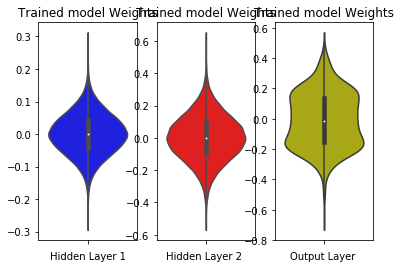

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>__ Model 3: sigmoid activation with Batch Normalization + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers.normalization import BatchNormalization

model_1 = Sequential()

model_1.add(Dense(501, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(101, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)) )
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 501)               393285    
_________________________________________________________________
batch_normalization_9 (Batch (None, 501)               2004      
_________________________________________________________________
dense_64 (Dense)             (None, 101)               50702     
_________________________________________________________________
batch_normalization_10 (Batc (None, 101)               404       
_________________________________________________________________
dense_65 (Dense)             (None, 10)                1020      
Total params: 447,415
Trainable params: 446,211
Non-trainable params: 1,204
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.2758 - acc: 0.9195 - val_loss: 0.1722 - val_acc: 0.9514
Epoch 2/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.1511 - acc: 0.9564 - val_loss: 0.1353 - val_acc: 0.9599
Epoch 3/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.1095 - acc: 0.9676 - val_loss: 0.1094 - val_acc: 0.9668
Epoch 4/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.0829 - acc: 0.9767 - val_loss: 0.1022 - val_acc: 0.9676
Epoch 5/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0654 - acc: 0.9807 - val_loss: 0.0973 - val_acc: 0.9709
Epoch 6/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.0524 - acc: 0.9845 - val_loss: 0.0808 - val_acc: 0.9754
Epoch 7/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.0402 - acc: 0.9876 - val_loss: 0.0815 - 

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.08285859919666254
Test accuracy: 0.9782


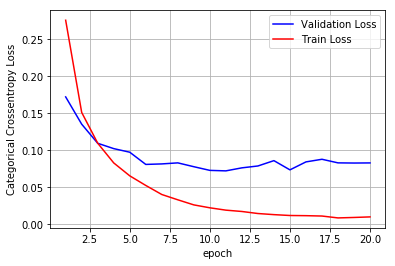

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


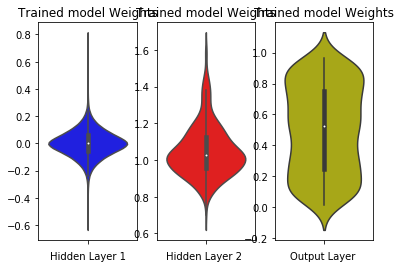

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 3: sigmoid activation with Batch Normalization + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(101, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 501)               393285    
_________________________________________________________________
batch_normalization_11 (Batc (None, 501)               2004      
_________________________________________________________________
dense_67 (Dense)             (None, 101)               50702     
_________________________________________________________________
batch_normalization_12 (Batc (None, 101)               404       
_________________________________________________________________
dense_68 (Dense)             (None, 10)                1020      
Total params: 447,415
Trainable params: 446,211
Non-trainable params: 1,204
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.4947 - acc: 0.8546 - val_loss: 0.3299 - val_acc: 0.9073
Epoch 2/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.3332 - acc: 0.9040 - val_loss: 0.2928 - val_acc: 0.9158
Epoch 3/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.3027 - acc: 0.9129 - val_loss: 0.2747 - val_acc: 0.9202
Epoch 4/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.2816 - acc: 0.9200 - val_loss: 0.2604 - val_acc: 0.9264
Epoch 5/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.2657 - acc: 0.9250 - val_loss: 0.2476 - val_acc: 0.9289
Epoch 6/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2517 - acc: 0.9290 - val_loss: 0.2372 - val_acc: 0.9318
Epoch 7/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2395 - acc: 0.9325 - val_loss: 0.2282 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.15652678999304773
Test accuracy: 0.9555


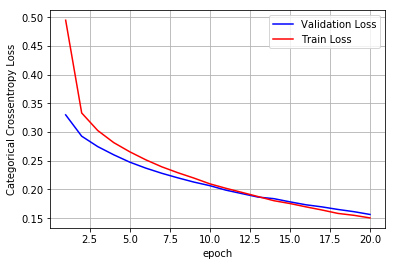

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


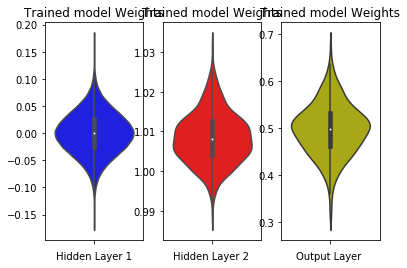

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model 3: sigmoid activation with Batch Normalization + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(101, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.140, seed=None)) )
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 501)               393285    
_________________________________________________________________
batch_normalization_13 (Batc (None, 501)               2004      
_________________________________________________________________
dense_70 (Dense)             (None, 101)               50702     
_________________________________________________________________
batch_normalization_14 (Batc (None, 101)               404       
_________________________________________________________________
dense_71 (Dense)             (None, 10)                1020      
Total params: 447,415
Trainable params: 446,211
Non-trainable params: 1,204
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.2760 - acc: 0.9192 - val_loss: 0.1669 - val_acc: 0.9509
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.1379 - acc: 0.9608 - val_loss: 0.1314 - val_acc: 0.9622
Epoch 3/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0949 - acc: 0.9726 - val_loss: 0.1107 - val_acc: 0.9681
Epoch 4/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0700 - acc: 0.9797 - val_loss: 0.0947 - val_acc: 0.9712
Epoch 5/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0520 - acc: 0.9850 - val_loss: 0.0927 - val_acc: 0.9708
Epoch 6/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0386 - acc: 0.9893 - val_loss: 0.0802 - val_acc: 0.9750
Epoch 7/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0310 - acc: 0.9908 - val_loss: 0.0809 - 

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.08880745201615282
Test accuracy: 0.978


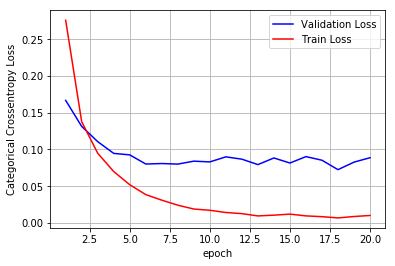

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


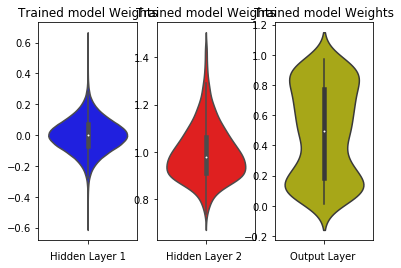

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 3: sigmoid activation with Batch Normalization + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(101, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.140, seed=None)) )
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 501)               393285    
_________________________________________________________________
batch_normalization_15 (Batc (None, 501)               2004      
_________________________________________________________________
dense_73 (Dense)             (None, 101)               50702     
_________________________________________________________________
batch_normalization_16 (Batc (None, 101)               404       
_________________________________________________________________
dense_74 (Dense)             (None, 10)                1020      
Total params: 447,415
Trainable params: 446,211
Non-trainable params: 1,204
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.6637 - acc: 0.8006 - val_loss: 0.3908 - val_acc: 0.8845
Epoch 2/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.3756 - acc: 0.8913 - val_loss: 0.3243 - val_acc: 0.9038
Epoch 3/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.3242 - acc: 0.9058 - val_loss: 0.2932 - val_acc: 0.9136
Epoch 4/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.2953 - acc: 0.9141 - val_loss: 0.2705 - val_acc: 0.9213
Epoch 5/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.2731 - acc: 0.9211 - val_loss: 0.2548 - val_acc: 0.9253
Epoch 6/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2566 - acc: 0.9257 - val_loss: 0.2433 - val_acc: 0.9294
Epoch 7/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2419 - acc: 0.9309 - val_loss: 0.2336 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.1633817608937621
Test accuracy: 0.9531


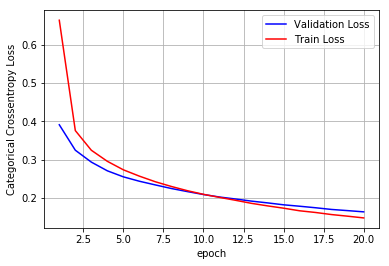

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


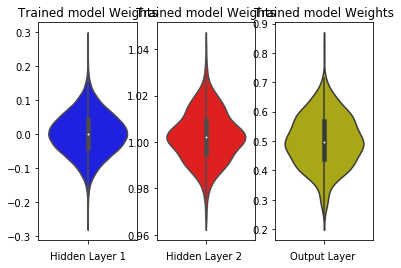

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>__ Model 4: relu activation with Dropout + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers import Dropout

model_1 = Sequential()

model_1.add(Dense(501, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(101, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)) )
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_381 (Dense)            (None, 501)               393285    
_________________________________________________________________
dropout_92 (Dropout)         (None, 501)               0         
_________________________________________________________________
dense_382 (Dense)            (None, 101)               50702     
_________________________________________________________________
dropout_93 (Dropout)         (None, 101)               0         
_________________________________________________________________
dense_383 (Dense)            (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 319us/step - loss: 0.4638 - acc: 0.8602 - val_loss: 0.1439 - val_acc: 0.9571
Epoch 2/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.2088 - acc: 0.9400 - val_loss: 0.1112 - val_acc: 0.9649
Epoch 3/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.1623 - acc: 0.9535 - val_loss: 0.0915 - val_acc: 0.9717
Epoch 4/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.1363 - acc: 0.9607 - val_loss: 0.0827 - val_acc: 0.9747
Epoch 5/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.1213 - acc: 0.9652 - val_loss: 0.0799 - val_acc: 0.9758
Epoch 6/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1099 - acc: 0.9674 - val_loss: 0.0724 - val_acc: 0.9788
Epoch 7/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.1004 - acc: 0.9708 - val_loss: 0.0716 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.06914280058416516
Test accuracy: 0.9815


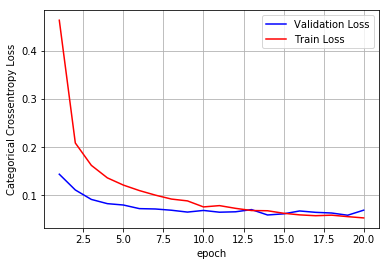

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


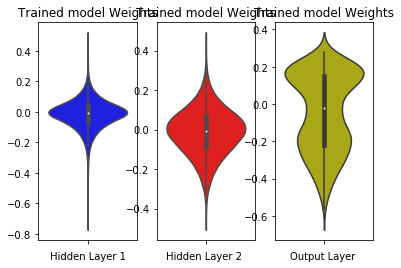

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 4: relu activation with Dropout + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
from keras.layers import Dropout

model_1 = Sequential()

model_1.add(Dense(501, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(101, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 501)               393285    
_________________________________________________________________
dropout_3 (Dropout)          (None, 501)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 101)               50702     
_________________________________________________________________
dropout_4 (Dropout)          (None, 101)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 123us/step - loss: 1.5733 - acc: 0.4800 - val_loss: 0.7011 - val_acc: 0.8353
Epoch 2/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.8652 - acc: 0.7283 - val_loss: 0.4606 - val_acc: 0.8812
Epoch 3/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.6788 - acc: 0.7924 - val_loss: 0.3780 - val_acc: 0.8968
Epoch 4/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.5825 - acc: 0.8250 - val_loss: 0.3346 - val_acc: 0.9066
Epoch 5/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.5230 - acc: 0.8443 - val_loss: 0.3061 - val_acc: 0.9135
Epoch 6/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.4789 - acc: 0.8579 - val_loss: 0.2844 - val_acc: 0.9185
Epoch 7/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.4452 - acc: 0.8700 - val_loss: 0.2661 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.16511225905790924
Test accuracy: 0.9512


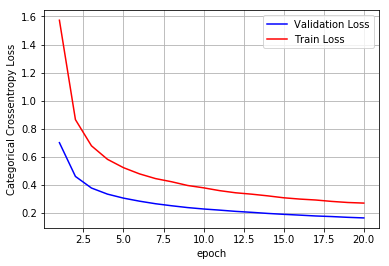

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


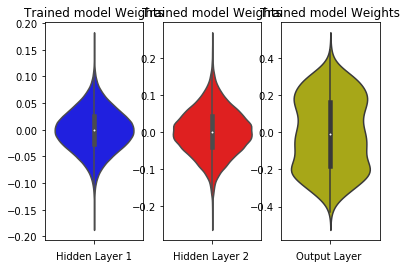

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model 4: relu activation with Dropout + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(101, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.140, seed=None)) )
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 501)               393285    
_________________________________________________________________
dropout_5 (Dropout)          (None, 501)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 101)               50702     
_________________________________________________________________
dropout_6 (Dropout)          (None, 101)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.6131 - acc: 0.8089 - val_loss: 0.1817 - val_acc: 0.9450
Epoch 2/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.2652 - acc: 0.9215 - val_loss: 0.1312 - val_acc: 0.9595
Epoch 3/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.2044 - acc: 0.9403 - val_loss: 0.1069 - val_acc: 0.9672
Epoch 4/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.1690 - acc: 0.9506 - val_loss: 0.0954 - val_acc: 0.9714
Epoch 5/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.1521 - acc: 0.9559 - val_loss: 0.0826 - val_acc: 0.9768
Epoch 6/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1344 - acc: 0.9603 - val_loss: 0.0822 - val_acc: 0.9764
Epoch 7/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.1214 - acc: 0.9642 - val_loss: 0.0844 - 

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.06936063391418429
Test accuracy: 0.9827


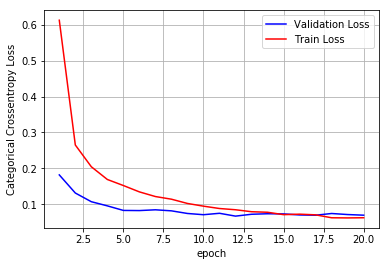

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


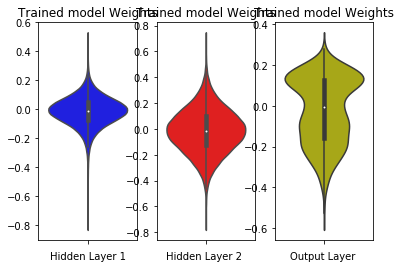

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 4: relu activation with Dropout + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(101, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.140, seed=None)) )
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='relu'))

model_1.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 501)               393285    
_________________________________________________________________
dropout_7 (Dropout)          (None, 501)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 101)               50702     
_________________________________________________________________
dropout_8 (Dropout)          (None, 101)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 127us/step - loss: 2.4836 - acc: 0.1349 - val_loss: 2.1475 - val_acc: 0.1301
Epoch 2/20
60000/60000 [==============================] - 5s 91us/step - loss: 2.1063 - acc: 0.2343 - val_loss: 1.8386 - val_acc: 0.6029
Epoch 3/20
60000/60000 [==============================] - 5s 91us/step - loss: 1.8665 - acc: 0.4130 - val_loss: 1.5459 - val_acc: 0.6107
Epoch 4/20
60000/60000 [==============================] - 6s 93us/step - loss: 1.6604 - acc: 0.5121 - val_loss: 1.2064 - val_acc: 0.7669
Epoch 5/20
60000/60000 [==============================] - 5s 91us/step - loss: 1.9830 - acc: 0.2503 - val_loss: 1.6435 - val_acc: 0.5173
Epoch 6/20
60000/60000 [==============================] - 5s 91us/step - loss: 1.7051 - acc: 0.4325 - val_loss: 1.4205 - val_acc: 0.4527
Epoch 7/20
60000/60000 [==============================] - 5s 91us/step - loss: 1.5773 - acc: 0.5022 - val_loss: 2.0462 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 1.2869609331130982
Test accuracy: 0.6801


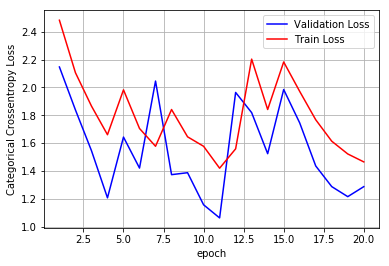

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


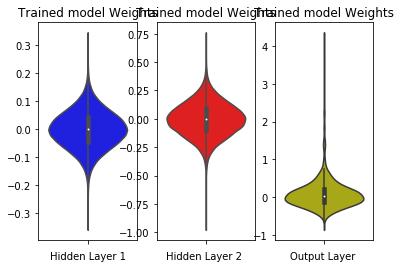

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>__ Model 5: relu activation with BatchNormalization + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers import Dropout

model_1 = Sequential()

model_1.add(Dense(501, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(101, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)) )
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 501)               393285    
_________________________________________________________________
batch_normalization_23 (Batc (None, 501)               2004      
_________________________________________________________________
dense_101 (Dense)            (None, 101)               50702     
_________________________________________________________________
batch_normalization_24 (Batc (None, 101)               404       
_________________________________________________________________
dense_102 (Dense)            (None, 10)                1020      
Total params: 447,415
Trainable params: 446,211
Non-trainable params: 1,204
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.1878 - acc: 0.9446 - val_loss: 0.1002 - val_acc: 0.9689
Epoch 2/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0724 - acc: 0.9784 - val_loss: 0.0814 - val_acc: 0.9749
Epoch 3/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0495 - acc: 0.9845 - val_loss: 0.0801 - val_acc: 0.9733
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0370 - acc: 0.9886 - val_loss: 0.0759 - val_acc: 0.9775
Epoch 5/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0268 - acc: 0.9914 - val_loss: 0.0737 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0256 - acc: 0.9914 - val_loss: 0.0724 - val_acc: 0.9778
Epoch 7/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0204 - acc: 0.9936 - val_loss: 0.0823 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.07735706123386735
Test accuracy: 0.981


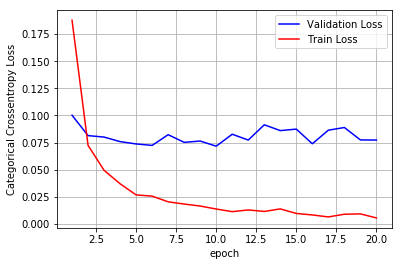

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


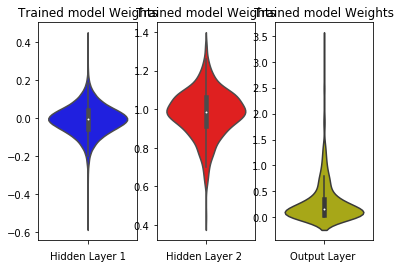

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 5: relu activation with BatchNormalization + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(101, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 501)               393285    
_________________________________________________________________
batch_normalization_25 (Batc (None, 501)               2004      
_________________________________________________________________
dense_104 (Dense)            (None, 101)               50702     
_________________________________________________________________
batch_normalization_26 (Batc (None, 101)               404       
_________________________________________________________________
dense_105 (Dense)            (None, 10)                1020      
Total params: 447,415
Trainable params: 446,211
Non-trainable params: 1,204
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.4448 - acc: 0.8724 - val_loss: 0.2391 - val_acc: 0.9323
Epoch 2/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.2120 - acc: 0.9419 - val_loss: 0.1804 - val_acc: 0.9472
Epoch 3/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.1629 - acc: 0.9563 - val_loss: 0.1512 - val_acc: 0.9564
Epoch 4/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.1350 - acc: 0.9636 - val_loss: 0.1349 - val_acc: 0.9605
Epoch 5/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1147 - acc: 0.9693 - val_loss: 0.1232 - val_acc: 0.9634
Epoch 6/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0997 - acc: 0.9735 - val_loss: 0.1151 - val_acc: 0.9660
Epoch 7/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0883 - acc: 0.9765 - val_loss: 0.1079 - val_a

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.0816448771264404
Test accuracy: 0.9742


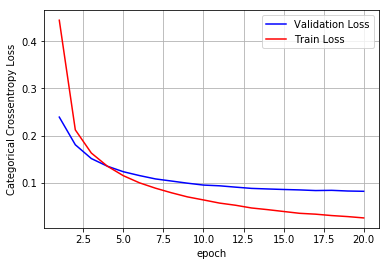

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


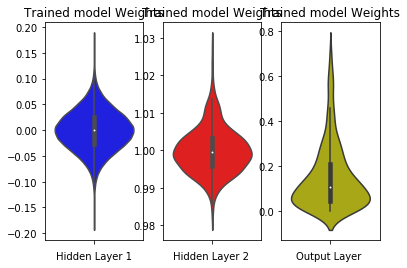

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model 5: relu activation with BatchNormalization + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(101, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.140, seed=None)) )
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 501)               393285    
_________________________________________________________________
batch_normalization_27 (Batc (None, 501)               2004      
_________________________________________________________________
dense_107 (Dense)            (None, 101)               50702     
_________________________________________________________________
batch_normalization_28 (Batc (None, 101)               404       
_________________________________________________________________
dense_108 (Dense)            (None, 10)                1020      
Total params: 447,415
Trainable params: 446,211
Non-trainable params: 1,204
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.2129 - acc: 0.9362 - val_loss: 0.1227 - val_acc: 0.9652
Epoch 2/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0773 - acc: 0.9769 - val_loss: 0.0909 - val_acc: 0.9716
Epoch 3/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0486 - acc: 0.9848 - val_loss: 0.0830 - val_acc: 0.9741
Epoch 4/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0335 - acc: 0.9897 - val_loss: 0.0767 - val_acc: 0.9763
Epoch 5/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0240 - acc: 0.9924 - val_loss: 0.0815 - val_acc: 0.9761
Epoch 6/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0196 - acc: 0.9939 - val_loss: 0.0772 - val_acc: 0.9767
Epoch 7/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0167 - acc: 0.9949 - val_loss: 0.0735 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.0760320247169545
Test accuracy: 0.9814


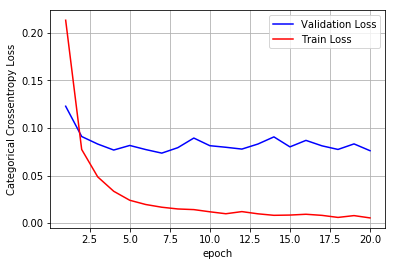

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


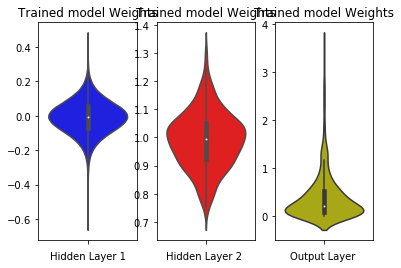

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 5: relu activation with BatchNormalization + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(101, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.140, seed=None)) )
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 501)               393285    
_________________________________________________________________
batch_normalization_29 (Batc (None, 501)               2004      
_________________________________________________________________
dense_110 (Dense)            (None, 101)               50702     
_________________________________________________________________
batch_normalization_30 (Batc (None, 101)               404       
_________________________________________________________________
dense_111 (Dense)            (None, 10)                1020      
Total params: 447,415
Trainable params: 446,211
Non-trainable params: 1,204
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.6669 - acc: 0.7980 - val_loss: 0.3380 - val_acc: 0.9068
Epoch 2/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.3145 - acc: 0.9114 - val_loss: 0.2554 - val_acc: 0.9283
Epoch 3/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2498 - acc: 0.9288 - val_loss: 0.2168 - val_acc: 0.9386
Epoch 4/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.2120 - acc: 0.9394 - val_loss: 0.1932 - val_acc: 0.9421
Epoch 5/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.1870 - acc: 0.9468 - val_loss: 0.1766 - val_acc: 0.9472
Epoch 6/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.1676 - acc: 0.9529 - val_loss: 0.1636 - val_acc: 0.9500
Epoch 7/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.1523 - acc: 0.9574 - val_loss: 0.1542 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.10358885963968932
Test accuracy: 0.9679


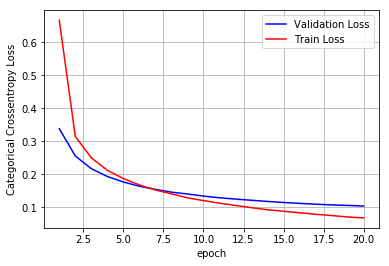

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


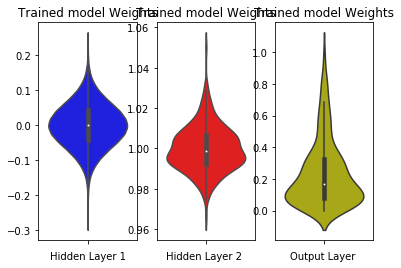

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>__ Model 6: sigmoid activation with Dropout + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers import Dropout

model_1 = Sequential()

model_1.add(Dense(501, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(101, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)) )
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 501)               393285    
_________________________________________________________________
dropout_43 (Dropout)         (None, 501)               0         
_________________________________________________________________
dense_221 (Dense)            (None, 101)               50702     
_________________________________________________________________
dropout_44 (Dropout)         (None, 101)               0         
_________________________________________________________________
dense_222 (Dense)            (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.8513 - acc: 0.7398 - val_loss: 0.3079 - val_acc: 0.9126
Epoch 2/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.3761 - acc: 0.8914 - val_loss: 0.2277 - val_acc: 0.9295
Epoch 3/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.2942 - acc: 0.9155 - val_loss: 0.1868 - val_acc: 0.9426
Epoch 4/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.2443 - acc: 0.9305 - val_loss: 0.1563 - val_acc: 0.9501
Epoch 5/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.2115 - acc: 0.9380 - val_loss: 0.1347 - val_acc: 0.9583
Epoch 6/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.1849 - acc: 0.9470 - val_loss: 0.1198 - val_acc: 0.9635
Epoch 7/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.1650 - acc: 0.9515 - val_loss: 0.1086 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.06690293591122609
Test accuracy: 0.9799


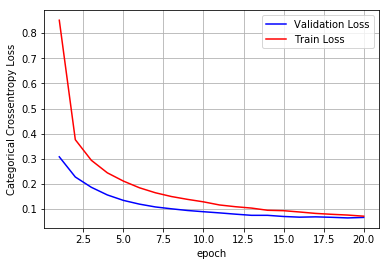

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


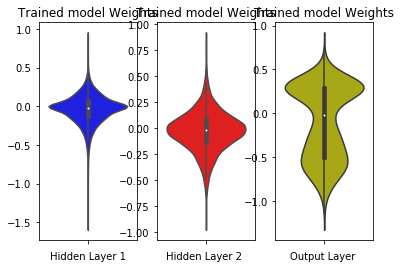

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 6: sigmoid activation with Dropout + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(101, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_223 (Dense)            (None, 501)               393285    
_________________________________________________________________
dropout_45 (Dropout)         (None, 501)               0         
_________________________________________________________________
dense_224 (Dense)            (None, 101)               50702     
_________________________________________________________________
dropout_46 (Dropout)         (None, 101)               0         
_________________________________________________________________
dense_225 (Dense)            (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 205us/step - loss: 2.4230 - acc: 0.1096 - val_loss: 2.2459 - val_acc: 0.3144
Epoch 2/20
60000/60000 [==============================] - 6s 100us/step - loss: 2.3073 - acc: 0.1349 - val_loss: 2.2150 - val_acc: 0.3575
Epoch 3/20
60000/60000 [==============================] - 6s 101us/step - loss: 2.2586 - acc: 0.1629 - val_loss: 2.1813 - val_acc: 0.4956
Epoch 4/20
60000/60000 [==============================] - 6s 98us/step - loss: 2.2145 - acc: 0.1935 - val_loss: 2.1318 - val_acc: 0.5269
Epoch 5/20
60000/60000 [==============================] - 6s 99us/step - loss: 2.1645 - acc: 0.2266 - val_loss: 2.0569 - val_acc: 0.5315
Epoch 6/20
60000/60000 [==============================] - 6s 98us/step - loss: 2.0958 - acc: 0.2628 - val_loss: 1.9503 - val_acc: 0.5720
Epoch 7/20
60000/60000 [==============================] - 6s 100us/step - loss: 2.0047 - acc: 0.3028 - val_loss: 1.8128 - va

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.7754171266555786
Test accuracy: 0.7899


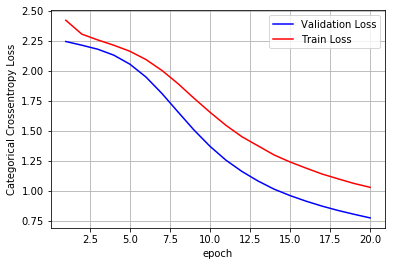

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


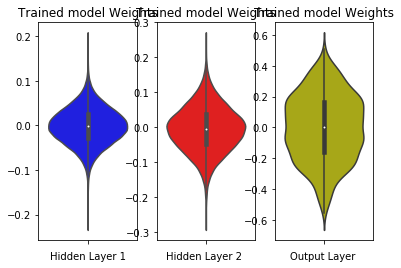

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model 6: sigmoid activation with Dropout + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(101, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.140, seed=None)) )
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_226 (Dense)            (None, 501)               393285    
_________________________________________________________________
dropout_47 (Dropout)         (None, 501)               0         
_________________________________________________________________
dense_227 (Dense)            (None, 101)               50702     
_________________________________________________________________
dropout_48 (Dropout)         (None, 101)               0         
_________________________________________________________________
dense_228 (Dense)            (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.8554 - acc: 0.7380 - val_loss: 0.3123 - val_acc: 0.9111
Epoch 2/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.3896 - acc: 0.8885 - val_loss: 0.2285 - val_acc: 0.9296
Epoch 3/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.3027 - acc: 0.9133 - val_loss: 0.1835 - val_acc: 0.9455
Epoch 4/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.2491 - acc: 0.9288 - val_loss: 0.1546 - val_acc: 0.9524
Epoch 5/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.2110 - acc: 0.9395 - val_loss: 0.1343 - val_acc: 0.9596
Epoch 6/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.1883 - acc: 0.9461 - val_loss: 0.1225 - val_acc: 0.9613
Epoch 7/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.1698 - acc: 0.9510 - val_loss: 0.1089 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.0663997630263446
Test accuracy: 0.9792


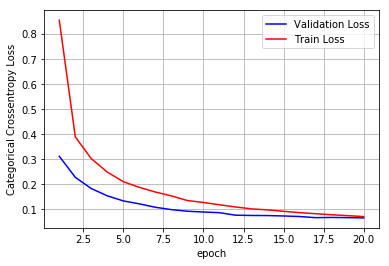

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


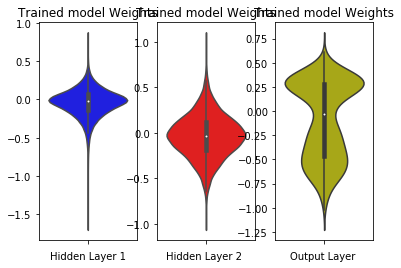

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 6: sigmoid activation with Dropout + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(501, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(101, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.140, seed=None)) )
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_229 (Dense)            (None, 501)               393285    
_________________________________________________________________
dropout_49 (Dropout)         (None, 501)               0         
_________________________________________________________________
dense_230 (Dense)            (None, 101)               50702     
_________________________________________________________________
dropout_50 (Dropout)         (None, 101)               0         
_________________________________________________________________
dense_231 (Dense)            (None, 10)                1020      
Total params: 445,007
Trainable params: 445,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 210us/step - loss: 2.5177 - acc: 0.1128 - val_loss: 2.1730 - val_acc: 0.3444
Epoch 2/20
60000/60000 [==============================] - 6s 98us/step - loss: 2.3079 - acc: 0.1532 - val_loss: 2.0714 - val_acc: 0.4773
Epoch 3/20
60000/60000 [==============================] - 6s 98us/step - loss: 2.1883 - acc: 0.2049 - val_loss: 1.9582 - val_acc: 0.5786
Epoch 4/20
60000/60000 [==============================] - 6s 98us/step - loss: 2.0803 - acc: 0.2603 - val_loss: 1.8170 - val_acc: 0.6196
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 1.9657 - acc: 0.3152 - val_loss: 1.6462 - val_acc: 0.6714
Epoch 6/20
60000/60000 [==============================] - 6s 97us/step - loss: 1.8343 - acc: 0.3668 - val_loss: 1.4731 - val_acc: 0.6891
Epoch 7/20
60000/60000 [==============================] - 6s 97us/step - loss: 1.7068 - acc: 0.4148 - val_loss: 1.3130 - val_a

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.632832354927063
Test accuracy: 0.8226


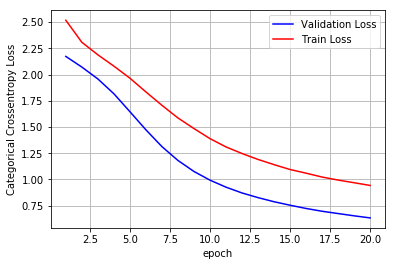

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


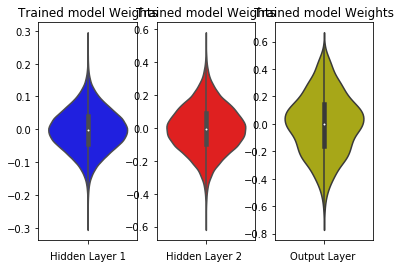

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Architecture 2: 784-256-128-64-10</h3>

<h3>__ Model 1: sigmoid activation + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers.normalization import BatchNormalization

model_1 = Sequential()

model_1.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, seed=None)))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0072, seed=None)))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_125 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_126 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_127 (Dense)            (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.8760 - acc: 0.7448 - val_loss: 0.3209 - val_acc: 0.9153
Epoch 2/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2588 - acc: 0.9281 - val_loss: 0.2015 - val_acc: 0.9423
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1746 - acc: 0.9507 - val_loss: 0.1569 - val_acc: 0.9545
Epoch 4/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1323 - acc: 0.9616 - val_loss: 0.1389 - val_acc: 0.9566
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1047 - acc: 0.9701 - val_loss: 0.1176 - val_acc: 0.9650
Epoch 6/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0841 - acc: 0.9760 - val_loss: 0.1084 - val_acc: 0.9688
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0686 - acc: 0.9797 - val_loss: 0.0899 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.08640015179301262
Test accuracy: 0.9786


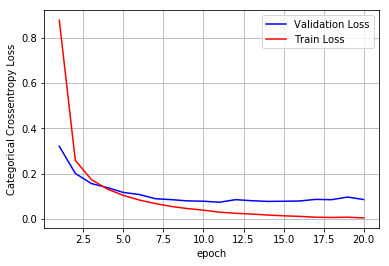

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


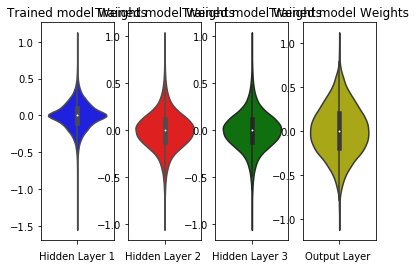

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 1 : sigmoid activation + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, seed=None)))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_129 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_130 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_131 (Dense)            (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 113us/step - loss: 2.3099 - acc: 0.1117 - val_loss: 2.2968 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 2.2953 - acc: 0.1162 - val_loss: 2.2928 - val_acc: 0.1330
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 2.2909 - acc: 0.1320 - val_loss: 2.2887 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 2.2863 - acc: 0.1271 - val_loss: 2.2830 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 3s 55us/step - loss: 2.2811 - acc: 0.1346 - val_loss: 2.2775 - val_acc: 0.1838
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 2.2749 - acc: 0.1742 - val_loss: 2.2708 - val_acc: 0.1138
Epoch 7/20
60000/60000 [==============================] - 3s 53us/step - loss: 2.2678 - acc: 0.1795 - val_loss: 2.2627 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 1.229913805580139
Test accuracy: 0.6201


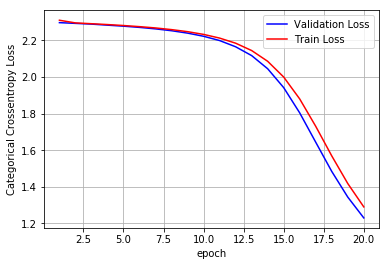

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


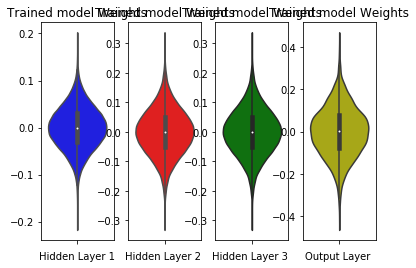

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 1 : sigmoid activation + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_133 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_134 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_135 (Dense)            (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.7385 - acc: 0.8276 - val_loss: 0.2796 - val_acc: 0.9212
Epoch 2/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2314 - acc: 0.9343 - val_loss: 0.1906 - val_acc: 0.9441
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1616 - acc: 0.9536 - val_loss: 0.1458 - val_acc: 0.9572
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1220 - acc: 0.9652 - val_loss: 0.1167 - val_acc: 0.9662
Epoch 5/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0949 - acc: 0.9723 - val_loss: 0.0996 - val_acc: 0.9705
Epoch 6/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0766 - acc: 0.9779 - val_loss: 0.0902 - val_acc: 0.9731
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0627 - acc: 0.9817 - val_loss: 0.0860 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.08769395060807583
Test accuracy: 0.9771


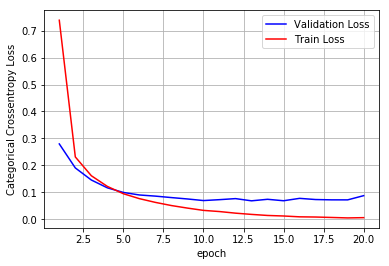

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


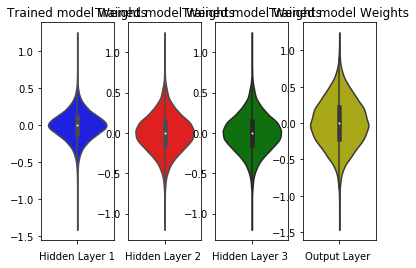

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 1 : sigmoid activation + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_137 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_138 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_139 (Dense)            (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 117us/step - loss: 2.2985 - acc: 0.1428 - val_loss: 2.2770 - val_acc: 0.2314
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 2.2641 - acc: 0.2536 - val_loss: 2.2480 - val_acc: 0.2746
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 2.2321 - acc: 0.3406 - val_loss: 2.2109 - val_acc: 0.3880
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 2.1887 - acc: 0.4152 - val_loss: 2.1580 - val_acc: 0.4814
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 2.1253 - acc: 0.4758 - val_loss: 2.0791 - val_acc: 0.5080
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 2.0311 - acc: 0.5068 - val_loss: 1.9640 - val_acc: 0.5120
Epoch 7/20
60000/60000 [==============================] - 3s 54us/step - loss: 1.8969 - acc: 0.5282 - val_loss: 1.8070 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.669477147102356
Test accuracy: 0.8342


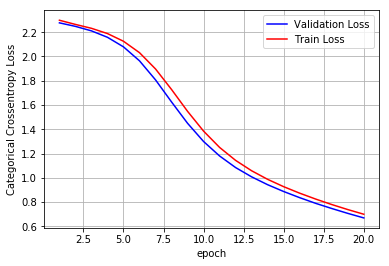

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


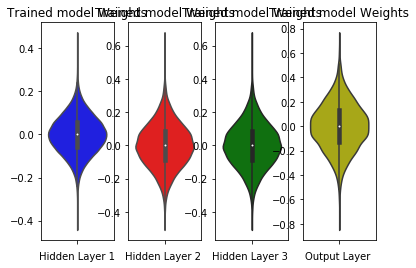

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>__ Model 2: Relu activation + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers.normalization import BatchNormalization

model_1 = Sequential()

model_1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, seed=None)))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_141 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_142 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_143 (Dense)            (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.2817 - acc: 0.9171 - val_loss: 0.1166 - val_acc: 0.9636
Epoch 2/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1032 - acc: 0.9687 - val_loss: 0.0982 - val_acc: 0.9691
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0663 - acc: 0.9800 - val_loss: 0.0856 - val_acc: 0.9738
Epoch 4/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0497 - acc: 0.9842 - val_loss: 0.0852 - val_acc: 0.9749
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0372 - acc: 0.9882 - val_loss: 0.0692 - val_acc: 0.9798
Epoch 6/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0305 - acc: 0.9899 - val_loss: 0.0849 - val_acc: 0.9768
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0248 - acc: 0.9919 - val_loss: 0.0800 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.09922539564829713
Test accuracy: 0.9788


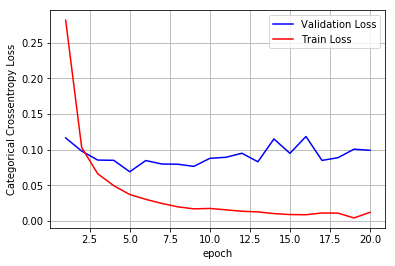

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


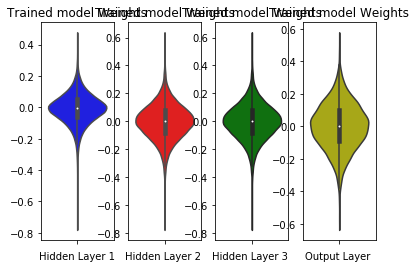

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 2 : relu activation + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, seed=None)))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_145 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_146 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_147 (Dense)            (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 120us/step - loss: 1.3541 - acc: 0.6439 - val_loss: 0.5662 - val_acc: 0.8555
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.4572 - acc: 0.8753 - val_loss: 0.3586 - val_acc: 0.8995
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.3475 - acc: 0.9017 - val_loss: 0.3047 - val_acc: 0.9131
Epoch 4/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.3032 - acc: 0.9123 - val_loss: 0.2734 - val_acc: 0.9201
Epoch 5/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2749 - acc: 0.9211 - val_loss: 0.2541 - val_acc: 0.9261
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2533 - acc: 0.9272 - val_loss: 0.2368 - val_acc: 0.9304
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2359 - acc: 0.9321 - val_loss: 0.2216 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.1292183303233236
Test accuracy: 0.9612


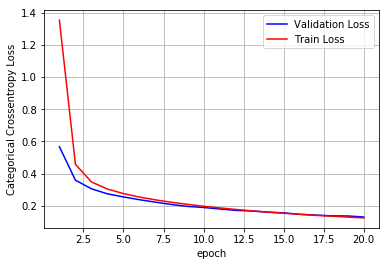

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


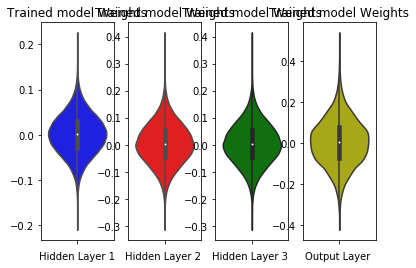

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 1 : relu activation + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_149 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_150 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_151 (Dense)            (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.2832 - acc: 0.9147 - val_loss: 0.1477 - val_acc: 0.9520
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1029 - acc: 0.9688 - val_loss: 0.0940 - val_acc: 0.9712
Epoch 3/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0679 - acc: 0.9786 - val_loss: 0.0928 - val_acc: 0.9710
Epoch 4/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0479 - acc: 0.9846 - val_loss: 0.0804 - val_acc: 0.9756
Epoch 5/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0338 - acc: 0.9892 - val_loss: 0.0970 - val_acc: 0.9723
Epoch 6/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0297 - acc: 0.9902 - val_loss: 0.0848 - val_acc: 0.9753
Epoch 7/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0200 - acc: 0.9935 - val_loss: 0.0804 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.10201168950064675
Test accuracy: 0.9799


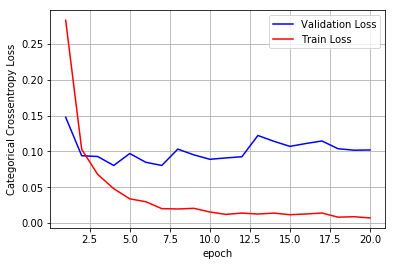

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


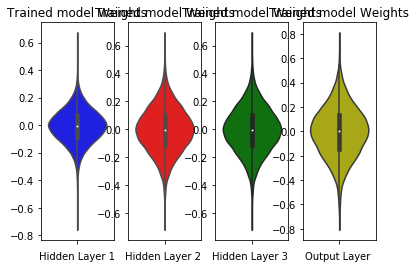

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 2 : relu activation + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_153 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_154 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_155 (Dense)            (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.7937 - acc: 0.7617 - val_loss: 0.3894 - val_acc: 0.8821
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3569 - acc: 0.8937 - val_loss: 0.2971 - val_acc: 0.9112
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2892 - acc: 0.9139 - val_loss: 0.2571 - val_acc: 0.9245
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.2524 - acc: 0.9249 - val_loss: 0.2282 - val_acc: 0.9327
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2269 - acc: 0.9331 - val_loss: 0.2142 - val_acc: 0.9363
Epoch 6/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2074 - acc: 0.9388 - val_loss: 0.1967 - val_acc: 0.9404
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1923 - acc: 0.9434 - val_loss: 0.1869 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.12574072407316417
Test accuracy: 0.9617


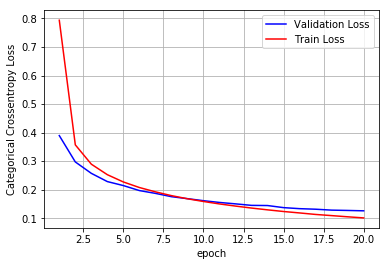

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


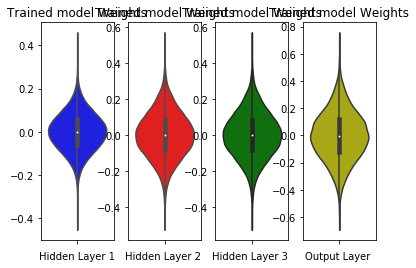

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>__ Model 3: sigmoid activation with Batch Normalization + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers.normalization import BatchNormalization

model_1 = Sequential()

model_1.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 256)               200960    
_________________________________________________________________
batch_normalization_31 (Batc (None, 256)               1024      
_________________________________________________________________
dense_157 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_32 (Batc (None, 128)               512       
_________________________________________________________________
dense_158 (Dense)            (None, 64)                8256      
_________________________________________________________________
batch_normalization_33 (Batc (None, 64)                256       
_________________________________________________________________
dense_159 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.2908 - acc: 0.9151 - val_loss: 0.1803 - val_acc: 0.9445
Epoch 2/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.1422 - acc: 0.9582 - val_loss: 0.1245 - val_acc: 0.9623
Epoch 3/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0958 - acc: 0.9706 - val_loss: 0.0965 - val_acc: 0.9691
Epoch 4/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0709 - acc: 0.9781 - val_loss: 0.0969 - val_acc: 0.9685
Epoch 5/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0545 - acc: 0.9828 - val_loss: 0.0946 - val_acc: 0.9705
Epoch 6/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0430 - acc: 0.9860 - val_loss: 0.0905 - val_acc: 0.9718
Epoch 7/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0372 - acc: 0.9879 - val_loss: 0.0897 - val_a

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.09331667342400396
Test accuracy: 0.9786


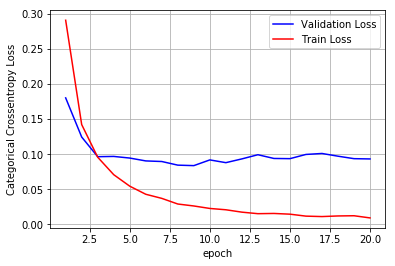

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


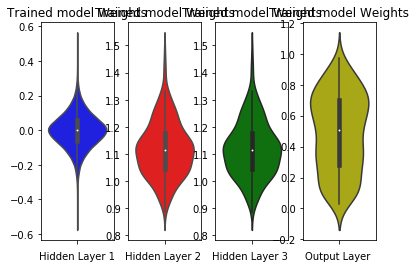

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 3: sigmoid activation with Batch Normalization + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 256)               200960    
_________________________________________________________________
batch_normalization_34 (Batc (None, 256)               1024      
_________________________________________________________________
dense_161 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_35 (Batc (None, 128)               512       
_________________________________________________________________
dense_162 (Dense)            (None, 64)                8256      
_________________________________________________________________
batch_normalization_36 (Batc (None, 64)                256       
_________________________________________________________________
dense_163 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.5440 - acc: 0.8426 - val_loss: 0.3466 - val_acc: 0.9038
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.3401 - acc: 0.9034 - val_loss: 0.2991 - val_acc: 0.9161
Epoch 3/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.3022 - acc: 0.9135 - val_loss: 0.2760 - val_acc: 0.9198
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2769 - acc: 0.9208 - val_loss: 0.2611 - val_acc: 0.9248
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.2596 - acc: 0.9264 - val_loss: 0.2501 - val_acc: 0.9288
Epoch 6/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2433 - acc: 0.9311 - val_loss: 0.2376 - val_acc: 0.9330
Epoch 7/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2296 - acc: 0.9355 - val_loss: 0.2248 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.1358664358958602
Test accuracy: 0.9598


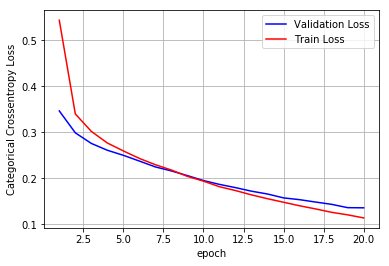

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


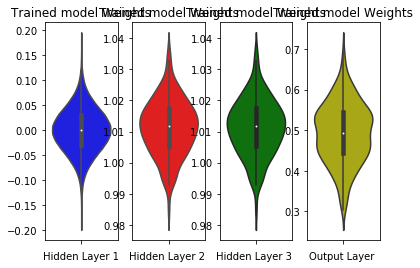

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model 3: sigmoid activation with Batch Normalization + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_164 (Dense)            (None, 256)               200960    
_________________________________________________________________
batch_normalization_37 (Batc (None, 256)               1024      
_________________________________________________________________
dense_165 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_38 (Batc (None, 128)               512       
_________________________________________________________________
dense_166 (Dense)            (None, 64)                8256      
_________________________________________________________________
batch_normalization_39 (Batc (None, 64)                256       
_________________________________________________________________
dense_167 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2980 - acc: 0.9131 - val_loss: 0.1682 - val_acc: 0.9521
Epoch 2/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.1335 - acc: 0.9607 - val_loss: 0.1217 - val_acc: 0.9645
Epoch 3/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0851 - acc: 0.9739 - val_loss: 0.0975 - val_acc: 0.9687
Epoch 4/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0600 - acc: 0.9816 - val_loss: 0.0904 - val_acc: 0.9708
Epoch 5/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0414 - acc: 0.9868 - val_loss: 0.0890 - val_acc: 0.9722
Epoch 6/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0310 - acc: 0.9905 - val_loss: 0.0876 - val_acc: 0.9740
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0269 - acc: 0.9917 - val_loss: 0.0847 - val_a

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09873631281140514
Test accuracy: 0.9785


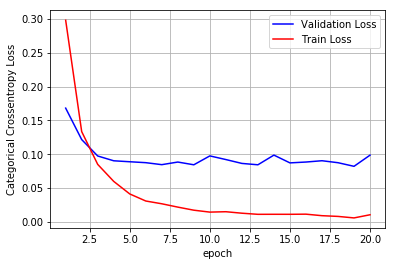

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


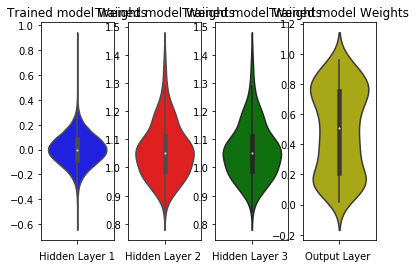

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 3: sigmoid activation with Batch Normalization + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 256)               200960    
_________________________________________________________________
batch_normalization_40 (Batc (None, 256)               1024      
_________________________________________________________________
dense_169 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_41 (Batc (None, 128)               512       
_________________________________________________________________
dense_170 (Dense)            (None, 64)                8256      
_________________________________________________________________
batch_normalization_42 (Batc (None, 64)                256       
_________________________________________________________________
dense_171 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.7626 - acc: 0.7702 - val_loss: 0.4319 - val_acc: 0.8769
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.4071 - acc: 0.8838 - val_loss: 0.3441 - val_acc: 0.9006
Epoch 3/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.3439 - acc: 0.9008 - val_loss: 0.3051 - val_acc: 0.9110
Epoch 4/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.3082 - acc: 0.9106 - val_loss: 0.2811 - val_acc: 0.9187
Epoch 5/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2837 - acc: 0.9188 - val_loss: 0.2628 - val_acc: 0.9237
Epoch 6/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2650 - acc: 0.9235 - val_loss: 0.2489 - val_acc: 0.9269
Epoch 7/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2498 - acc: 0.9277 - val_loss: 0.2363 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.15813388714268803
Test accuracy: 0.9524


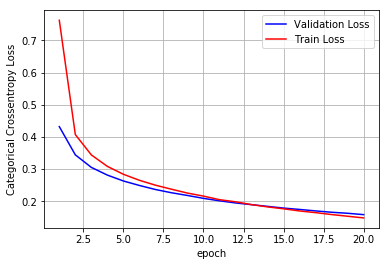

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


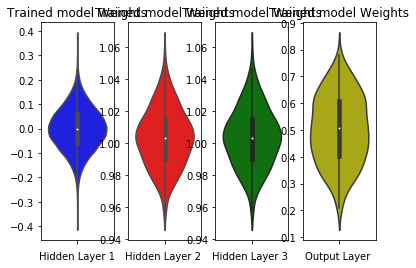

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>__ Model 4: relu activation with Dropout + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers import Dropout

model_1 = Sequential()


model_1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_172 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_173 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_174 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_175 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.7965 - acc: 0.7478 - val_loss: 0.2032 - val_acc: 0.9425
Epoch 2/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.3421 - acc: 0.9091 - val_loss: 0.1607 - val_acc: 0.9530
Epoch 3/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.2676 - acc: 0.9309 - val_loss: 0.1420 - val_acc: 0.9599
Epoch 4/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2294 - acc: 0.9418 - val_loss: 0.1213 - val_acc: 0.9654
Epoch 5/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.2003 - acc: 0.9481 - val_loss: 0.1086 - val_acc: 0.9697
Epoch 6/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.1850 - acc: 0.9524 - val_loss: 0.0990 - val_acc: 0.9735
Epoch 7/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.1673 - acc: 0.9574 - val_loss: 0.1028 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.08730042533672168
Test accuracy: 0.9787


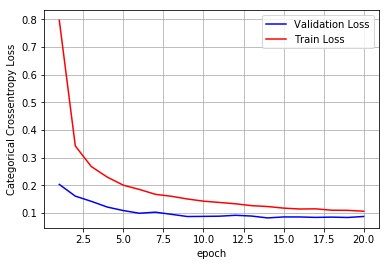

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


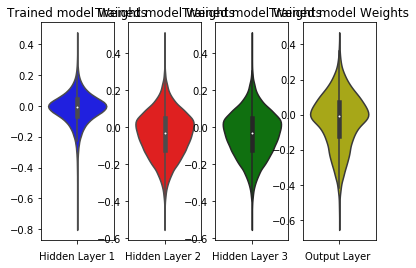

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 4: relu activation with Dropout + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
from keras.layers import Dropout

model_1 = Sequential()

model_1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_177 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_178 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_24 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_179 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 147us/step - loss: 2.1701 - acc: 0.2146 - val_loss: 1.6725 - val_acc: 0.6721
Epoch 2/20
60000/60000 [==============================] - 4s 65us/step - loss: 1.6120 - acc: 0.4465 - val_loss: 0.9077 - val_acc: 0.7901
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 1.1954 - acc: 0.5915 - val_loss: 0.6395 - val_acc: 0.8424
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.9695 - acc: 0.6790 - val_loss: 0.4995 - val_acc: 0.8754
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.8325 - acc: 0.7312 - val_loss: 0.4247 - val_acc: 0.8908
Epoch 6/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.7422 - acc: 0.7670 - val_loss: 0.3742 - val_acc: 0.9013
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.6728 - acc: 0.7934 - val_loss: 0.3348 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.18373567296117543
Test accuracy: 0.9489


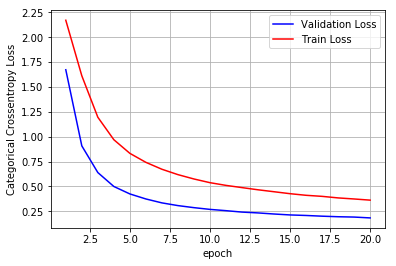

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


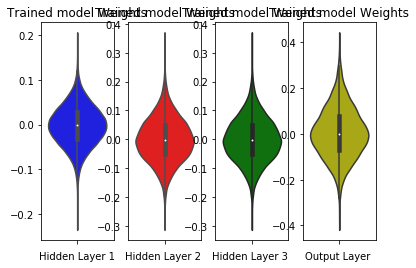

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model 4: relu activation with Dropout + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_181 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_182 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_27 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_183 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 162us/step - loss: 1.2960 - acc: 0.5797 - val_loss: 0.3377 - val_acc: 0.9141
Epoch 2/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.5141 - acc: 0.8522 - val_loss: 0.2182 - val_acc: 0.9406
Epoch 3/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3821 - acc: 0.8988 - val_loss: 0.1788 - val_acc: 0.9507
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.3148 - acc: 0.9180 - val_loss: 0.1619 - val_acc: 0.9560
Epoch 5/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2691 - acc: 0.9321 - val_loss: 0.1402 - val_acc: 0.9614
Epoch 6/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2427 - acc: 0.9374 - val_loss: 0.1321 - val_acc: 0.9652
Epoch 7/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2238 - acc: 0.9431 - val_loss: 0.1249 - val_a

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09710459082686866
Test accuracy: 0.9758


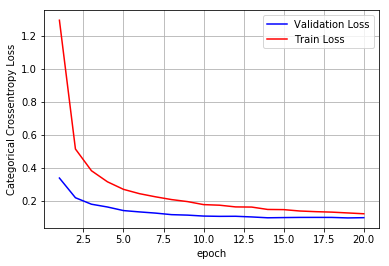

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


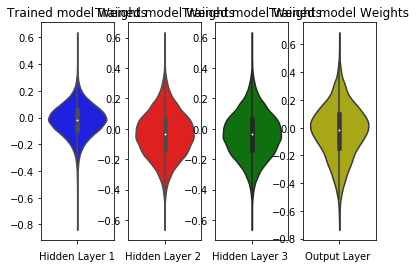

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 4: relu activation with Dropout + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='relu'))

model_1.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_185 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_186 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_30 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_187 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 150us/step - loss: 3.1887 - acc: 0.1117 - val_loss: 2.7026 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - loss: 2.6555 - acc: 0.1124 - val_loss: 2.6031 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 2.5769 - acc: 0.1124 - val_loss: 2.5491 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 2.5319 - acc: 0.1124 - val_loss: 2.5130 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 2.5006 - acc: 0.1124 - val_loss: 2.4865 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 4s 65us/step - loss: 2.4778 - acc: 0.1123 - val_loss: 2.4658 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 2.4587 - acc: 0.1124 - val_loss: 2.4491 - val_ac

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 2.3546517501831055
Test accuracy: 0.1135


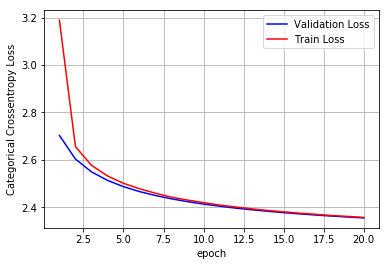

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


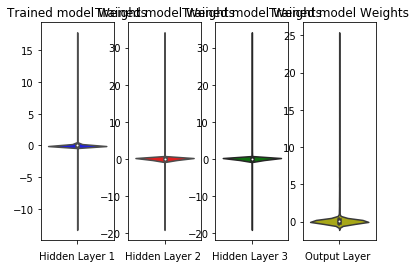

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>__ Model 5: relu activation with BatchNormalization + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers import Dropout

model_1 = Sequential()


model_1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_188 (Dense)            (None, 256)               200960    
_________________________________________________________________
batch_normalization_43 (Batc (None, 256)               1024      
_________________________________________________________________
dense_189 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_44 (Batc (None, 128)               512       
_________________________________________________________________
dense_190 (Dense)            (None, 64)                8256      
_________________________________________________________________
batch_normalization_45 (Batc (None, 64)                256       
_________________________________________________________________
dense_191 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.2296 - acc: 0.9319 - val_loss: 0.1219 - val_acc: 0.9621
Epoch 2/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0858 - acc: 0.9738 - val_loss: 0.0889 - val_acc: 0.9729
Epoch 3/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0555 - acc: 0.9826 - val_loss: 0.0923 - val_acc: 0.9718
Epoch 4/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0433 - acc: 0.9864 - val_loss: 0.0810 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0326 - acc: 0.9896 - val_loss: 0.0906 - val_acc: 0.9729
Epoch 6/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0277 - acc: 0.9908 - val_loss: 0.0785 - val_acc: 0.9788
Epoch 7/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0265 - acc: 0.9912 - val_loss: 0.0749 - val_a

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.08400668230069168
Test accuracy: 0.9808


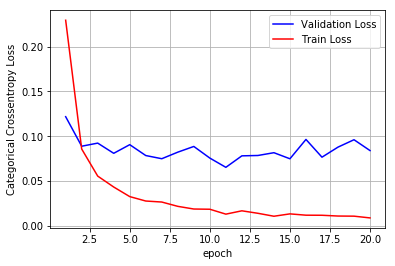

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


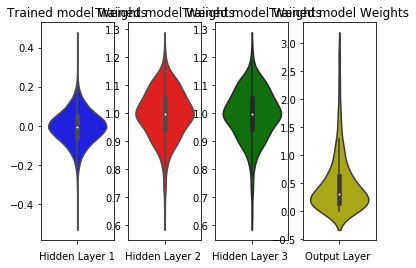

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 5: relu activation with BatchNormalization + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
model_1 = Sequential()


model_1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 256)               200960    
_________________________________________________________________
batch_normalization_46 (Batc (None, 256)               1024      
_________________________________________________________________
dense_193 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_47 (Batc (None, 128)               512       
_________________________________________________________________
dense_194 (Dense)            (None, 64)                8256      
_________________________________________________________________
batch_normalization_48 (Batc (None, 64)                256       
_________________________________________________________________
dense_195 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.5485 - acc: 0.8431 - val_loss: 0.2733 - val_acc: 0.9253
Epoch 2/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2490 - acc: 0.9311 - val_loss: 0.2015 - val_acc: 0.9417
Epoch 3/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1887 - acc: 0.9475 - val_loss: 0.1671 - val_acc: 0.9498
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.1544 - acc: 0.9561 - val_loss: 0.1473 - val_acc: 0.9568
Epoch 5/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.1318 - acc: 0.9627 - val_loss: 0.1332 - val_acc: 0.9615
Epoch 6/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1149 - acc: 0.9682 - val_loss: 0.1251 - val_acc: 0.9641
Epoch 7/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1010 - acc: 0.9717 - val_loss: 0.1168 - val_a

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.0863677886866033
Test accuracy: 0.9749


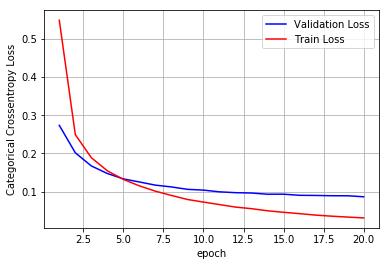

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


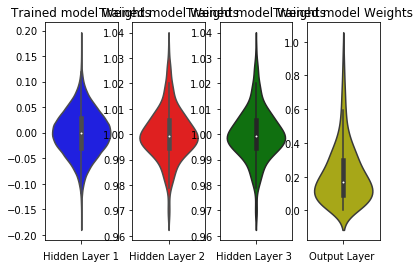

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model 5: relu activation with BatchNormalization + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 256)               200960    
_________________________________________________________________
batch_normalization_49 (Batc (None, 256)               1024      
_________________________________________________________________
dense_197 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_50 (Batc (None, 128)               512       
_________________________________________________________________
dense_198 (Dense)            (None, 64)                8256      
_________________________________________________________________
batch_normalization_51 (Batc (None, 64)                256       
_________________________________________________________________
dense_199 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.2985 - acc: 0.9135 - val_loss: 0.1218 - val_acc: 0.9621
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0964 - acc: 0.9709 - val_loss: 0.0972 - val_acc: 0.9712
Epoch 3/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0600 - acc: 0.9818 - val_loss: 0.0908 - val_acc: 0.9708
Epoch 4/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0419 - acc: 0.9870 - val_loss: 0.0753 - val_acc: 0.9765
Epoch 5/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0308 - acc: 0.9904 - val_loss: 0.0828 - val_acc: 0.9766
Epoch 6/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0262 - acc: 0.9912 - val_loss: 0.0846 - val_acc: 0.9742
Epoch 7/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0225 - acc: 0.9924 - val_loss: 0.0757 - val_a

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09224662557971605
Test accuracy: 0.9781


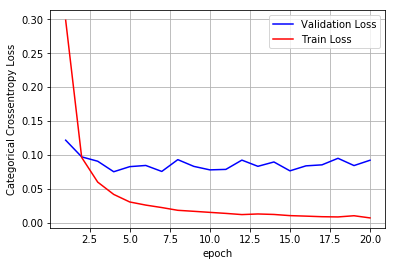

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


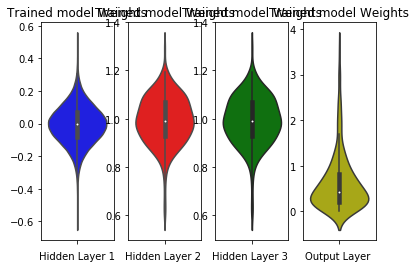

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 5: relu activation with BatchNormalization + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(BatchNormalization())
model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_200 (Dense)            (None, 256)               200960    
_________________________________________________________________
batch_normalization_52 (Batc (None, 256)               1024      
_________________________________________________________________
dense_201 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_53 (Batc (None, 128)               512       
_________________________________________________________________
dense_202 (Dense)            (None, 64)                8256      
_________________________________________________________________
batch_normalization_54 (Batc (None, 64)                256       
_________________________________________________________________
dense_203 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.8961 - acc: 0.7268 - val_loss: 0.4470 - val_acc: 0.8758
Epoch 2/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.4068 - acc: 0.8848 - val_loss: 0.3192 - val_acc: 0.9094
Epoch 3/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.3127 - acc: 0.9096 - val_loss: 0.2647 - val_acc: 0.9254
Epoch 4/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.2636 - acc: 0.9234 - val_loss: 0.2330 - val_acc: 0.9321
Epoch 5/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2308 - acc: 0.9319 - val_loss: 0.2118 - val_acc: 0.9381
Epoch 6/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2071 - acc: 0.9395 - val_loss: 0.1961 - val_acc: 0.9427
Epoch 7/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.1900 - acc: 0.9439 - val_loss: 0.1838 - val_a

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.12683080091178417
Test accuracy: 0.9605


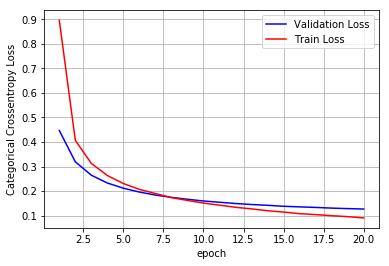

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


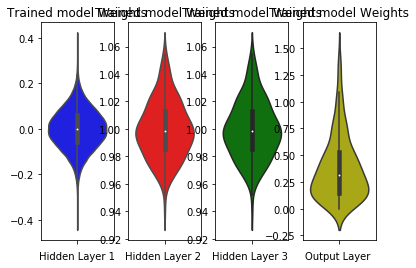

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>__ Model 6: sigmoid activation with Dropout + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers import Dropout

model_1 = Sequential()

model_1.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_204 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_205 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_206 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_33 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_207 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 178us/step - loss: 1.3987 - acc: 0.5296 - val_loss: 0.4613 - val_acc: 0.8859
Epoch 2/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.5704 - acc: 0.8409 - val_loss: 0.2848 - val_acc: 0.9204
Epoch 3/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.4230 - acc: 0.8883 - val_loss: 0.2292 - val_acc: 0.9334
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3520 - acc: 0.9083 - val_loss: 0.1947 - val_acc: 0.9436
Epoch 5/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3086 - acc: 0.9192 - val_loss: 0.1711 - val_acc: 0.9499
Epoch 6/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2774 - acc: 0.9289 - val_loss: 0.1532 - val_acc: 0.9566
Epoch 7/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2540 - acc: 0.9345 - val_loss: 0.1425 - val_a

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.09259034679569304
Test accuracy: 0.975


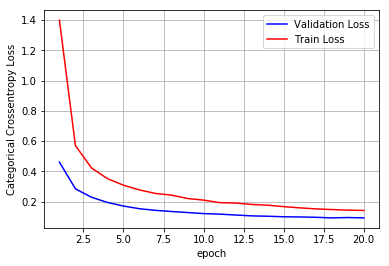

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


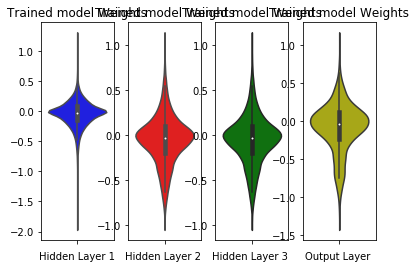

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 6: sigmoid activation with Dropout + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
model_1 = Sequential()
model_1.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_208 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_34 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_209 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_35 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_210 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_36 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_211 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 167us/step - loss: 2.4856 - acc: 0.1043 - val_loss: 2.2976 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 4s 68us/step - loss: 2.4040 - acc: 0.1020 - val_loss: 2.2957 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 4s 68us/step - loss: 2.3679 - acc: 0.1029 - val_loss: 2.2946 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 2.3450 - acc: 0.1051 - val_loss: 2.2938 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 4s 70us/step - loss: 2.3336 - acc: 0.1065 - val_loss: 2.2932 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 4s 69us/step - loss: 2.3249 - acc: 0.1063 - val_loss: 2.2930 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 4s 68us/step - loss: 2.3197 - acc: 0.1075 - val_loss: 2.2925 - val_a

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 2.2844085891723633
Test accuracy: 0.1497


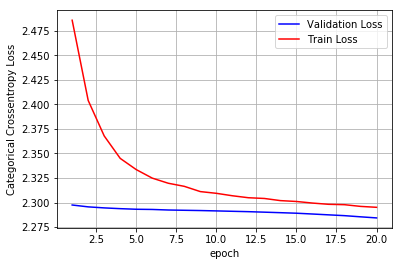

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


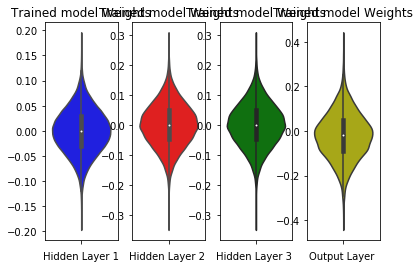

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model 6: sigmoid activation with Dropout + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_212 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_37 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_213 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_38 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_214 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_39 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_215 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 183us/step - loss: 1.3694 - acc: 0.5323 - val_loss: 0.5083 - val_acc: 0.8744
Epoch 2/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.6173 - acc: 0.8213 - val_loss: 0.3068 - val_acc: 0.9156
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.4543 - acc: 0.8774 - val_loss: 0.2334 - val_acc: 0.9352
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3723 - acc: 0.9027 - val_loss: 0.2074 - val_acc: 0.9399
Epoch 5/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3267 - acc: 0.9141 - val_loss: 0.1795 - val_acc: 0.9487
Epoch 6/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2898 - acc: 0.9245 - val_loss: 0.1637 - val_acc: 0.9531
Epoch 7/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2653 - acc: 0.9307 - val_loss: 0.1516 - val_a

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.10067519135973416
Test accuracy: 0.9733


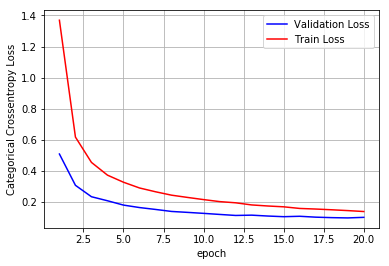

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


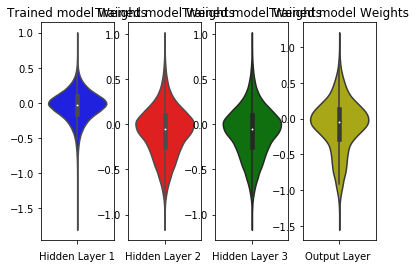

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 6: sigmoid activation with Dropout + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_216 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_40 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_217 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_41 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_218 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_42 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_219 (Dense)            (None, 10)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 172us/step - loss: 2.5109 - acc: 0.1016 - val_loss: 2.2875 - val_acc: 0.1222
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 2.4089 - acc: 0.1045 - val_loss: 2.2787 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 5s 75us/step - loss: 2.3652 - acc: 0.1096 - val_loss: 2.2738 - val_acc: 0.1796
Epoch 4/20
60000/60000 [==============================] - 4s 75us/step - loss: 2.3371 - acc: 0.1128 - val_loss: 2.2703 - val_acc: 0.1225
Epoch 5/20
60000/60000 [==============================] - 5s 80us/step - loss: 2.3203 - acc: 0.1162 - val_loss: 2.2664 - val_acc: 0.1360
Epoch 6/20
60000/60000 [==============================] - 4s 70us/step - loss: 2.3113 - acc: 0.1190 - val_loss: 2.2633 - val_acc: 0.1322
Epoch 7/20
60000/60000 [==============================] - 4s 70us/step - loss: 2.3031 - acc: 0.1226 - val_loss: 2.2594 - val_a

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 1.9437882654190064
Test accuracy: 0.4608


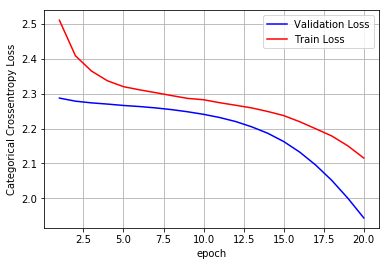

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


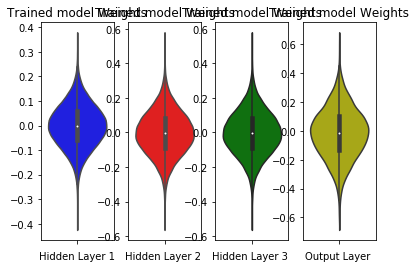

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Architecture 3: 784-512-256-128-64-32-10</h3>

<h3>__ Model 1: sigmoid activation + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers.normalization import BatchNormalization

model_1 = Sequential()

model_1.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model_1.add(Dense(256, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))

model_1.add(Dense(32, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.144, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_232 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_233 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_234 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_235 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_236 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_237 (Dense)            (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 263us/step - loss: 1.2712 - acc: 0.6198 - val_loss: 0.5745 - val_acc: 0.8861
Epoch 2/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.3896 - acc: 0.9166 - val_loss: 0.2913 - val_acc: 0.9354
Epoch 3/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.2297 - acc: 0.9460 - val_loss: 0.1945 - val_acc: 0.9533
Epoch 4/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.1603 - acc: 0.9611 - val_loss: 0.1773 - val_acc: 0.9536
Epoch 5/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.1197 - acc: 0.9702 - val_loss: 0.1351 - val_acc: 0.9649
Epoch 6/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0957 - acc: 0.9755 - val_loss: 0.1363 - val_acc: 0.9639
Epoch 7/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0799 - acc: 0.9789 - val_loss: 0.1266 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.09996185349542648
Test accuracy: 0.9791


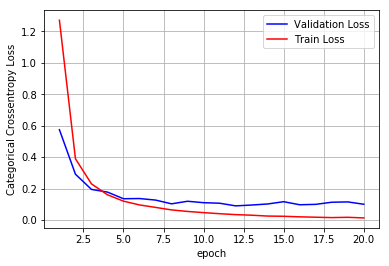

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


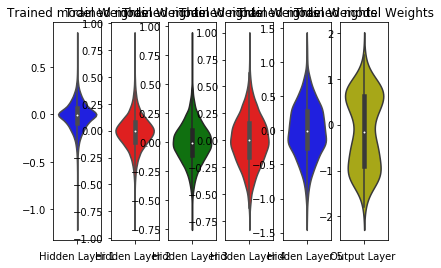

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 1 : sigmoid activation + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model_1.add(Dense(256, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))

model_1.add(Dense(32, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.144, seed=None)))


model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_238 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_239 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_240 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_241 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_242 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_243 (Dense)            (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 223us/step - loss: 2.3271 - acc: 0.1055 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 7s 111us/step - loss: 2.3015 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 7s 111us/step - loss: 2.3015 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 7s 110us/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 7s 111us/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 7s 110us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 7s 112us/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3010 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 2.3010412399291993
Test accuracy: 0.1135


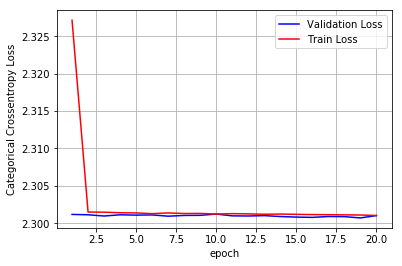

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


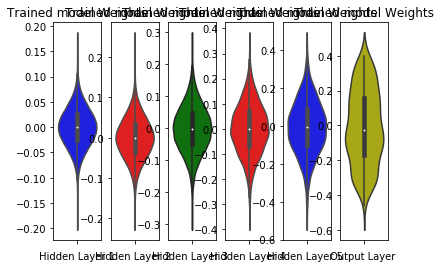

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 1 : sigmoid activation + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))

model_1.add(Dense(256, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))

model_1.add(Dense(32, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.246, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_244 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_245 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_246 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_247 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_248 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_249 (Dense)            (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 253us/step - loss: 1.0441 - acc: 0.7439 - val_loss: 0.3445 - val_acc: 0.9273
Epoch 2/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.2599 - acc: 0.9368 - val_loss: 0.1950 - val_acc: 0.9523
Epoch 3/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.1617 - acc: 0.9587 - val_loss: 0.1471 - val_acc: 0.9618
Epoch 4/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.1166 - acc: 0.9687 - val_loss: 0.1466 - val_acc: 0.9597
Epoch 5/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0900 - acc: 0.9760 - val_loss: 0.1027 - val_acc: 0.9727
Epoch 6/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0728 - acc: 0.9806 - val_loss: 0.1036 - val_acc: 0.9706
Epoch 7/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0591 - acc: 0.9838 - val_loss: 0.0923 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09138628843901679
Test accuracy: 0.9805


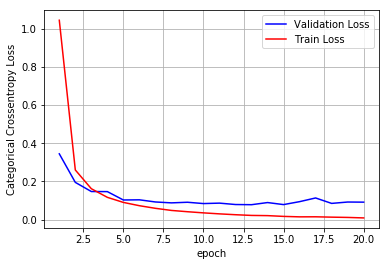

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


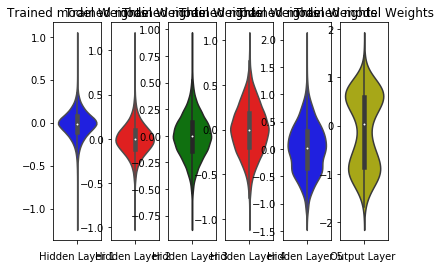

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 1 : sigmoid activation + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))

model_1.add(Dense(256, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))

model_1.add(Dense(32, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.246, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_250 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_251 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_252 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_253 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_254 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_255 (Dense)            (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 226us/step - loss: 2.3087 - acc: 0.1088 - val_loss: 2.3002 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 7s 113us/step - loss: 2.3000 - acc: 0.1124 - val_loss: 2.2993 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 7s 113us/step - loss: 2.2993 - acc: 0.1124 - val_loss: 2.2987 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 2.2986 - acc: 0.1124 - val_loss: 2.2980 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 7s 114us/step - loss: 2.2980 - acc: 0.1124 - val_loss: 2.2972 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 7s 115us/step - loss: 2.2972 - acc: 0.1131 - val_loss: 2.2965 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 7s 114us/step - loss: 2.2964 - acc: 0.1124 - val_loss: 2.2955 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 2.264263961029053
Test accuracy: 0.183


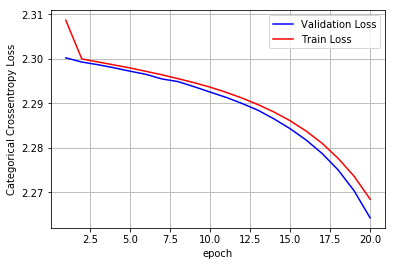

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


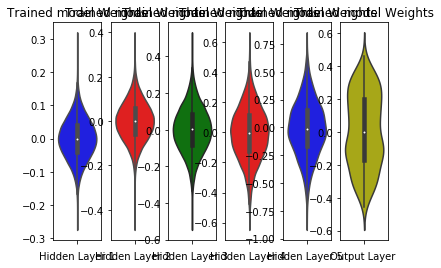

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>__ Model 2: Relu activation + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers.normalization import BatchNormalization

model_1 = Sequential()

model_1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model_1.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))

model_1.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.144, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_256 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_257 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_258 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_259 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_260 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_261 (Dense)            (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 265us/step - loss: 0.2845 - acc: 0.9142 - val_loss: 0.1108 - val_acc: 0.9663
Epoch 2/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.0967 - acc: 0.9707 - val_loss: 0.0917 - val_acc: 0.9708
Epoch 3/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0615 - acc: 0.9810 - val_loss: 0.0792 - val_acc: 0.9761
Epoch 4/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0471 - acc: 0.9851 - val_loss: 0.0773 - val_acc: 0.9767
Epoch 5/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0388 - acc: 0.9877 - val_loss: 0.0809 - val_acc: 0.9781
Epoch 6/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0308 - acc: 0.9900 - val_loss: 0.0755 - val_acc: 0.9793
Epoch 7/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0253 - acc: 0.9922 - val_loss: 0.0802 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.09181766118927444
Test accuracy: 0.9808


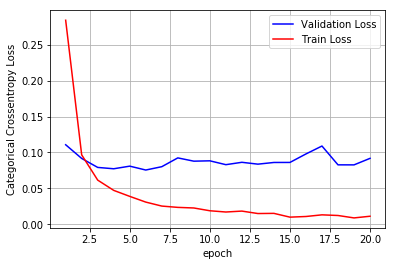

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


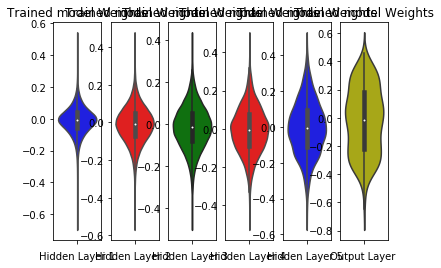

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 2 : relu activation + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model_1.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))

model_1.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.144, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_262 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_263 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_264 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_265 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_266 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_267 (Dense)            (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 233us/step - loss: 1.3393 - acc: 0.6293 - val_loss: 0.5091 - val_acc: 0.8592
Epoch 2/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.4106 - acc: 0.8830 - val_loss: 0.3277 - val_acc: 0.9056
Epoch 3/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.3083 - acc: 0.9101 - val_loss: 0.2764 - val_acc: 0.9201
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.2594 - acc: 0.9239 - val_loss: 0.2346 - val_acc: 0.9318
Epoch 5/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.2243 - acc: 0.9340 - val_loss: 0.2072 - val_acc: 0.9396
Epoch 6/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.1979 - acc: 0.9425 - val_loss: 0.1891 - val_acc: 0.9439
Epoch 7/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.1749 - acc: 0.9489 - val_loss: 0.1669 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.09889934923872351
Test accuracy: 0.9698


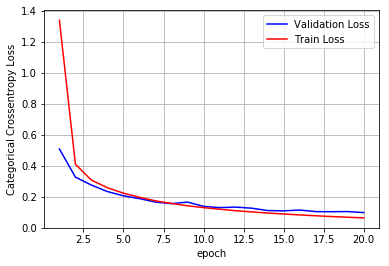

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


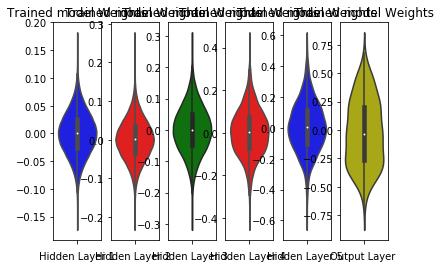

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 1 : relu activation + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))

model_1.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))

model_1.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.246, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_268 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_269 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_270 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_271 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_272 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_273 (Dense)            (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 262us/step - loss: 0.2790 - acc: 0.9162 - val_loss: 0.1251 - val_acc: 0.9616
Epoch 2/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0994 - acc: 0.9697 - val_loss: 0.0844 - val_acc: 0.9747
Epoch 3/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0627 - acc: 0.9802 - val_loss: 0.0868 - val_acc: 0.9735
Epoch 4/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0482 - acc: 0.9850 - val_loss: 0.0991 - val_acc: 0.9714
Epoch 5/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0383 - acc: 0.9878 - val_loss: 0.0938 - val_acc: 0.9732
Epoch 6/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0320 - acc: 0.9904 - val_loss: 0.1108 - val_acc: 0.9708
Epoch 7/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0337 - acc: 0.9890 - val_loss: 0.0799 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.08113763677500264
Test accuracy: 0.9832


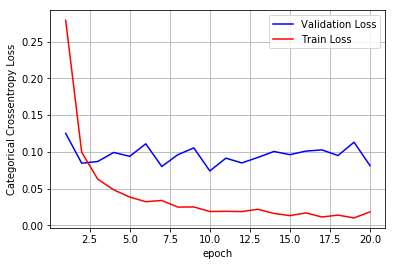

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


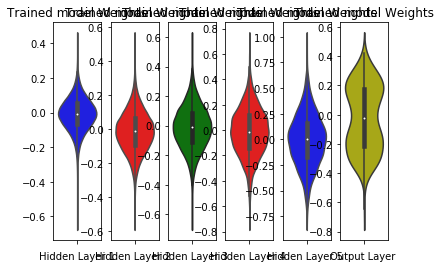

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 2 : relu activation + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))

model_1.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))

model_1.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.246, seed=None)))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_274 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_275 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_276 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_277 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_278 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_279 (Dense)            (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 229us/step - loss: 0.7107 - acc: 0.7839 - val_loss: 0.2985 - val_acc: 0.9172
Epoch 2/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.2700 - acc: 0.9200 - val_loss: 0.2416 - val_acc: 0.9275
Epoch 3/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.2097 - acc: 0.9370 - val_loss: 0.1927 - val_acc: 0.9437
Epoch 4/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.1755 - acc: 0.9482 - val_loss: 0.1759 - val_acc: 0.9485
Epoch 5/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1508 - acc: 0.9548 - val_loss: 0.1539 - val_acc: 0.9543
Epoch 6/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1336 - acc: 0.9601 - val_loss: 0.1495 - val_acc: 0.9555
Epoch 7/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.1188 - acc: 0.9646 - val_loss: 0.1577 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.10397074847645127
Test accuracy: 0.9681


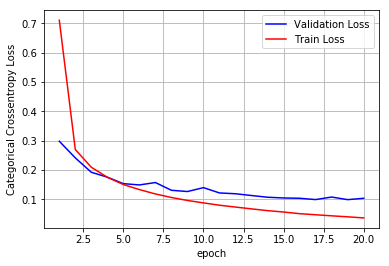

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


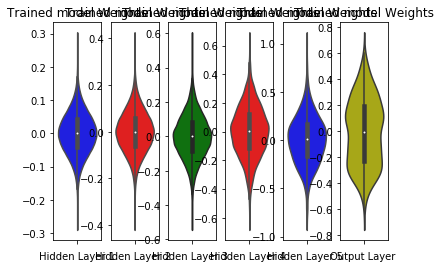

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>__ Model 3: sigmoid activation with Batch Normalization + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers.normalization import BatchNormalization

model_1 = Sequential()

model_1.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(256, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(32, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.144, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_280 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_55 (Batc (None, 512)               2048      
_________________________________________________________________
dense_281 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_56 (Batc (None, 256)               1024      
_________________________________________________________________
dense_282 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_57 (Batc (None, 128)               512       
_________________________________________________________________
dense_283 (Dense)            (None, 64)              

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 318us/step - loss: 0.2678 - acc: 0.9243 - val_loss: 0.1684 - val_acc: 0.9487
Epoch 2/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.1275 - acc: 0.9618 - val_loss: 0.1235 - val_acc: 0.9624
Epoch 3/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.0873 - acc: 0.9733 - val_loss: 0.0939 - val_acc: 0.9709
Epoch 4/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.0663 - acc: 0.9794 - val_loss: 0.1083 - val_acc: 0.9665
Epoch 5/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.0525 - acc: 0.9832 - val_loss: 0.0953 - val_acc: 0.9729
Epoch 6/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0433 - acc: 0.9853 - val_loss: 0.0893 - val_acc: 0.9734
Epoch 7/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0379 - acc: 0.9876 - val_loss: 0.

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.08085234306444763
Test accuracy: 0.9807


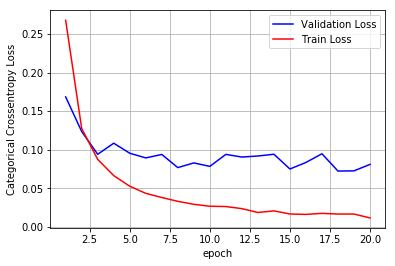

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


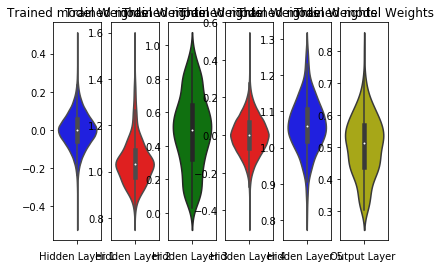

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 3: sigmoid activation with Batch Normalization + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(256, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(32, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.144, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_286 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_60 (Batc (None, 512)               2048      
_________________________________________________________________
dense_287 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_61 (Batc (None, 256)               1024      
_________________________________________________________________
dense_288 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_62 (Batc (None, 128)               512       
_________________________________________________________________
dense_289 (Dense)            (None, 64)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.5219 - acc: 0.8586 - val_loss: 0.3287 - val_acc: 0.9134
Epoch 2/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.3122 - acc: 0.9158 - val_loss: 0.2630 - val_acc: 0.9289
Epoch 3/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.2545 - acc: 0.9308 - val_loss: 0.2264 - val_acc: 0.9380
Epoch 4/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.2162 - acc: 0.9406 - val_loss: 0.1953 - val_acc: 0.9440
Epoch 5/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.1873 - acc: 0.9484 - val_loss: 0.1746 - val_acc: 0.9514
Epoch 6/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.1661 - acc: 0.9539 - val_loss: 0.1582 - val_acc: 0.9551
Epoch 7/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.1472 - acc: 0.9589 - val_loss: 0.1450 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.08773159670177848
Test accuracy: 0.9724


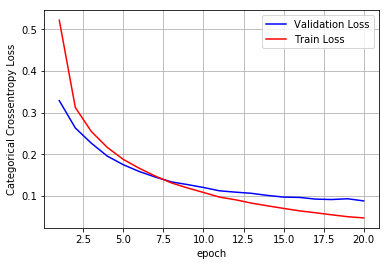

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


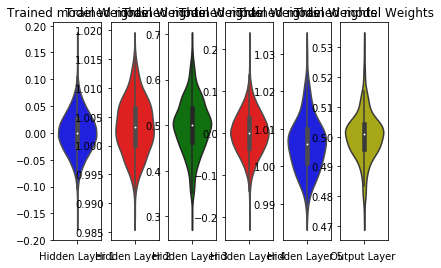

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model 3: sigmoid activation with Batch Normalization + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(256, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(32, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.246, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_296 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_68 (Batc (None, 512)               2048      
_________________________________________________________________
dense_297 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_69 (Batc (None, 256)               1024      
_________________________________________________________________
dense_298 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_70 (Batc (None, 128)               512       
_________________________________________________________________
dense_299 (Dense)            (None, 64)              

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.2701 - acc: 0.9236 - val_loss: 0.1536 - val_acc: 0.9563
Epoch 2/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.1160 - acc: 0.9662 - val_loss: 0.1135 - val_acc: 0.9655
Epoch 3/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.0746 - acc: 0.9773 - val_loss: 0.1076 - val_acc: 0.9680
Epoch 4/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.0576 - acc: 0.9823 - val_loss: 0.0956 - val_acc: 0.9721
Epoch 5/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0497 - acc: 0.9842 - val_loss: 0.0958 - val_acc: 0.9715
Epoch 6/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.0367 - acc: 0.9885 - val_loss: 0.0941 - val_acc: 0.9739
Epoch 7/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0333 - acc: 0.9891 - val_loss: 0.

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09214983825360687
Test accuracy: 0.9768


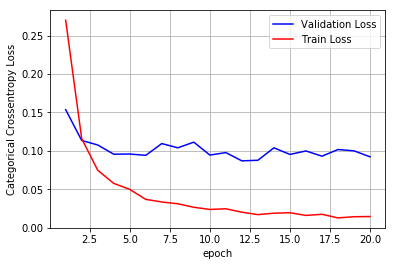

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


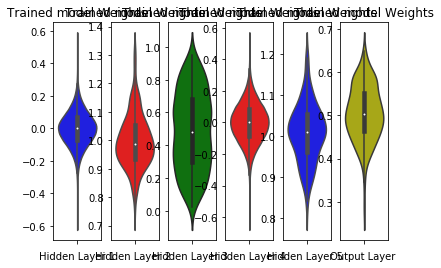

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 3: sigmoid activation with Batch Normalization + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(256, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(32, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.246, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_302 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_73 (Batc (None, 512)               2048      
_________________________________________________________________
dense_303 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_74 (Batc (None, 256)               1024      
_________________________________________________________________
dense_304 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_75 (Batc (None, 128)               512       
_________________________________________________________________
dense_305 (Dense)            (None, 64)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 299us/step - loss: 0.6867 - acc: 0.8078 - val_loss: 0.3902 - val_acc: 0.8962
Epoch 2/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.3560 - acc: 0.9028 - val_loss: 0.2973 - val_acc: 0.9182
Epoch 3/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.2827 - acc: 0.9214 - val_loss: 0.2543 - val_acc: 0.9292
Epoch 4/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.2421 - acc: 0.9328 - val_loss: 0.2247 - val_acc: 0.9376
Epoch 5/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.2133 - acc: 0.9401 - val_loss: 0.2044 - val_acc: 0.9415
Epoch 6/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.1903 - acc: 0.9469 - val_loss: 0.1916 - val_acc: 0.9442
Epoch 7/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.1724 - acc: 0.9524 - val_loss: 0.1779 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.12137281653508544
Test accuracy: 0.9636


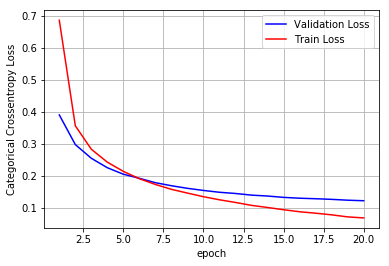

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


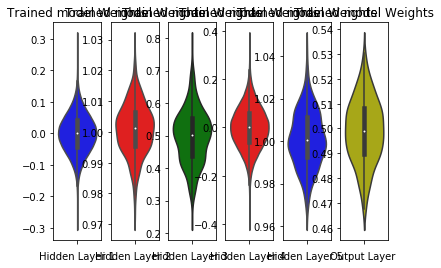

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>__ Model 4: relu activation with Dropout + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers import Dropout

model_1 = Sequential()


model_1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.144, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_308 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_51 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_309 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_52 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_310 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_53 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_311 (Dense)            (None, 64)              

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 310us/step - loss: 1.3868 - acc: 0.5024 - val_loss: 0.4142 - val_acc: 0.8914
Epoch 2/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.6075 - acc: 0.8186 - val_loss: 0.2524 - val_acc: 0.9460
Epoch 3/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.4409 - acc: 0.8844 - val_loss: 0.1889 - val_acc: 0.9579
Epoch 4/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.3746 - acc: 0.9079 - val_loss: 0.1703 - val_acc: 0.9604
Epoch 5/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.3320 - acc: 0.9201 - val_loss: 0.1655 - val_acc: 0.9616
Epoch 6/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.2988 - acc: 0.9278 - val_loss: 0.1445 - val_acc: 0.9682
Epoch 7/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.2785 - acc: 0.9329 - val_loss: 0.

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.11627653976904913
Test accuracy: 0.9773


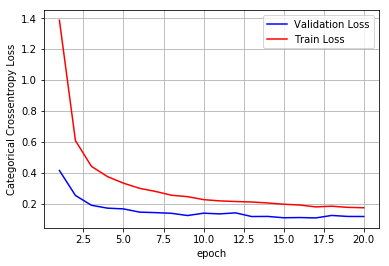

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


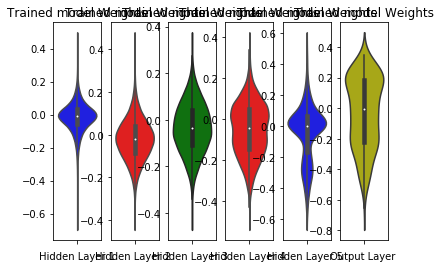

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 4: relu activation with Dropout + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
from keras.layers import Dropout

model_1 = Sequential()

model_1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.144, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_314 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_56 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_315 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_57 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_316 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_58 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_317 (Dense)            (None, 64)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 273us/step - loss: 2.3355 - acc: 0.1121 - val_loss: 2.2941 - val_acc: 0.1811
Epoch 2/20
60000/60000 [==============================] - 8s 131us/step - loss: 2.2741 - acc: 0.1477 - val_loss: 2.2116 - val_acc: 0.3238
Epoch 3/20
60000/60000 [==============================] - 8s 130us/step - loss: 2.1666 - acc: 0.2108 - val_loss: 1.9421 - val_acc: 0.4012
Epoch 4/20
60000/60000 [==============================] - 8s 136us/step - loss: 1.9858 - acc: 0.2903 - val_loss: 1.6541 - val_acc: 0.4895
Epoch 5/20
60000/60000 [==============================] - 8s 137us/step - loss: 1.7900 - acc: 0.3592 - val_loss: 1.3712 - val_acc: 0.6041
Epoch 6/20
60000/60000 [==============================] - 8s 140us/step - loss: 1.6006 - acc: 0.4216 - val_loss: 1.1334 - val_acc: 0.6617
Epoch 7/20
60000/60000 [==============================] - 8s 140us/step - loss: 1.4296 - acc: 0.4829 - val_loss: 0.9647 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.3417197764635086
Test accuracy: 0.9287


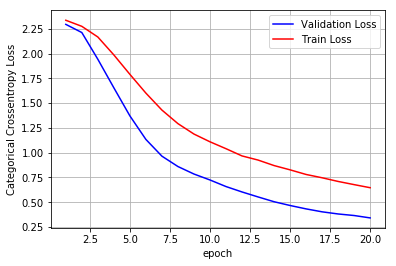

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


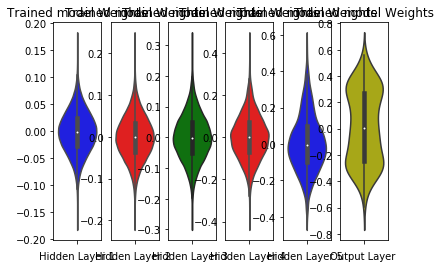

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model 4: relu activation with Dropout + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.246, seed=None)))
model_1.add(Dropout(0.5))
model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_320 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_61 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_321 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_62 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_322 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_63 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_323 (Dense)            (None, 64)              

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 315us/step - loss: 2.5172 - acc: 0.1457 - val_loss: 1.9460 - val_acc: 0.4235
Epoch 2/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.7438 - acc: 0.7852 - val_loss: 0.3831 - val_acc: 0.9258
Epoch 5/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.6178 - acc: 0.8307 - val_loss: 0.3184 - val_acc: 0.9350
Epoch 6/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.5332 - acc: 0.8617 - val_loss: 0.2759 - val_acc: 0.9450
Epoch 7/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.4859 - acc: 0.8783 - val_loss: 0.2544 - val_acc: 0.9489
Epoch 8/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.4368 - acc: 0.8917 - val_loss: 0.2352 - val_acc: 0.9515
Epoch 9/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.3979 - acc: 0.9033 - val_loss: 0.

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.14583226314671338
Test accuracy: 0.9713


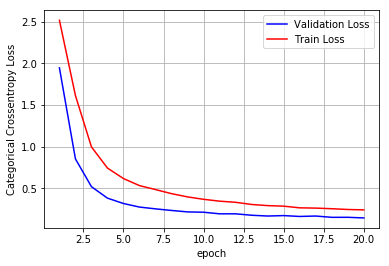

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


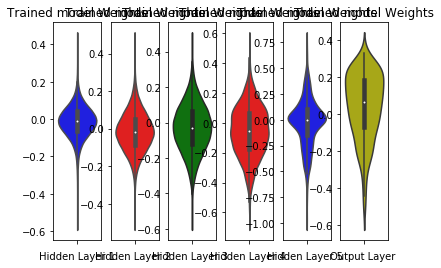

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 4: relu activation with Dropout + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.246, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='relu'))

model_1.summary()

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_326 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_66 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_327 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_67 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_328 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_68 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_329 (Dense)            (None, 64)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 279us/step - loss: 5.3447 - acc: 0.0981 - val_loss: 4.6554 - val_acc: 0.0982
Epoch 2/20
60000/60000 [==============================] - 8s 136us/step - loss: 3.8970 - acc: 0.0976 - val_loss: 3.2631 - val_acc: 0.0982
Epoch 3/20
60000/60000 [==============================] - 8s 133us/step - loss: 3.1754 - acc: 0.0978 - val_loss: 3.1298 - val_acc: 0.0982
Epoch 4/20
60000/60000 [==============================] - 8s 130us/step - loss: 3.0757 - acc: 0.0980 - val_loss: 3.0471 - val_acc: 0.0982
Epoch 5/20
60000/60000 [==============================] - 8s 130us/step - loss: 2.9984 - acc: 0.0977 - val_loss: 2.9858 - val_acc: 0.0982
Epoch 6/20
60000/60000 [==============================] - 8s 131us/step - loss: 2.9473 - acc: 0.0974 - val_loss: 2.9390 - val_acc: 0.0982
Epoch 7/20
60000/60000 [==============================] - 8s 130us/step - loss: 2.9067 - acc: 0.0979 - val_loss: 2.9007 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 2.6634529762268064
Test accuracy: 0.0982


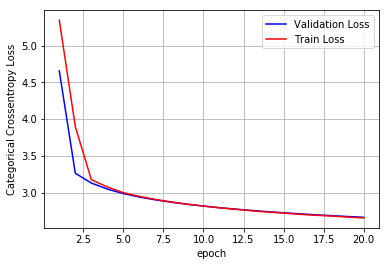

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


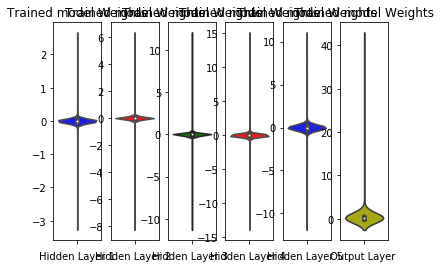

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>__ Model 5: relu activation with BatchNormalization + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers import Dropout

model_1 = Sequential()


model_1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.144, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_332 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_78 (Batc (None, 512)               2048      
_________________________________________________________________
dense_333 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_79 (Batc (None, 256)               1024      
_________________________________________________________________
dense_334 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_80 (Batc (None, 128)               512       
_________________________________________________________________
dense_335 (Dense)            (None, 64)              

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 334us/step - loss: 0.2513 - acc: 0.9309 - val_loss: 0.1254 - val_acc: 0.9586
Epoch 2/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.0933 - acc: 0.9713 - val_loss: 0.1002 - val_acc: 0.9703
Epoch 3/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0672 - acc: 0.9783 - val_loss: 0.0854 - val_acc: 0.9746
Epoch 4/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0514 - acc: 0.9841 - val_loss: 0.0884 - val_acc: 0.9729
Epoch 5/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0436 - acc: 0.9859 - val_loss: 0.0878 - val_acc: 0.9756
Epoch 6/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0349 - acc: 0.9885 - val_loss: 0.0958 - val_acc: 0.9720
Epoch 7/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0339 - acc: 0.9884 - val_loss: 0.

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.07139411058052793
Test accuracy: 0.9823


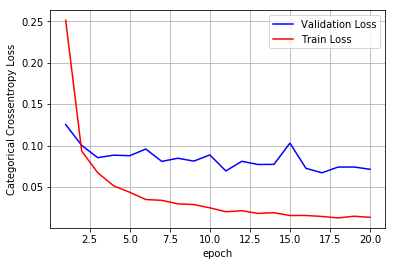

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


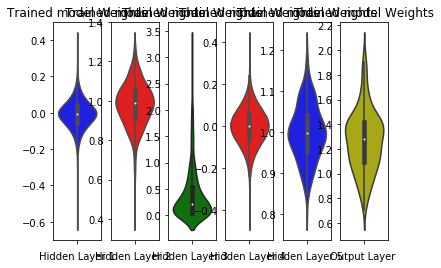

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 5: relu activation with BatchNormalization + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
model_1 = Sequential()


model_1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.144, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_338 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_83 (Batc (None, 512)               2048      
_________________________________________________________________
dense_339 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_84 (Batc (None, 256)               1024      
_________________________________________________________________
dense_340 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_85 (Batc (None, 128)               512       
_________________________________________________________________
dense_341 (Dense)            (None, 64)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 323us/step - loss: 0.5982 - acc: 0.8405 - val_loss: 0.2706 - val_acc: 0.9323
Epoch 2/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.2386 - acc: 0.9396 - val_loss: 0.1834 - val_acc: 0.9505
Epoch 3/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.1648 - acc: 0.9574 - val_loss: 0.1468 - val_acc: 0.9578
Epoch 4/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.1257 - acc: 0.9668 - val_loss: 0.1307 - val_acc: 0.9603
Epoch 5/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.1002 - acc: 0.9746 - val_loss: 0.1165 - val_acc: 0.9636
Epoch 6/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0821 - acc: 0.9793 - val_loss: 0.1080 - val_acc: 0.9667
Epoch 7/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0682 - acc: 0.9832 - val_loss: 0.1024 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.08727886506225914
Test accuracy: 0.9717


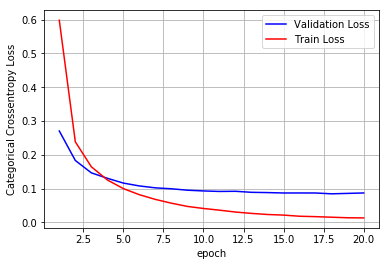

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


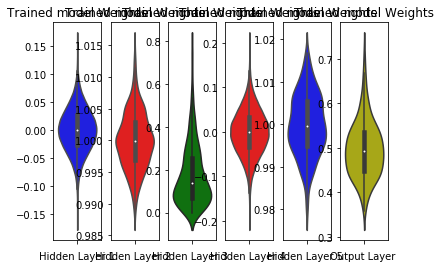

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model 5: relu activation with BatchNormalization + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.246, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_344 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_88 (Batc (None, 512)               2048      
_________________________________________________________________
dense_345 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_89 (Batc (None, 256)               1024      
_________________________________________________________________
dense_346 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_90 (Batc (None, 128)               512       
_________________________________________________________________
dense_347 (Dense)            (None, 64)              

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 363us/step - loss: 0.2827 - acc: 0.9230 - val_loss: 0.1201 - val_acc: 0.9652
Epoch 2/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0895 - acc: 0.9736 - val_loss: 0.0947 - val_acc: 0.9724
Epoch 3/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.0621 - acc: 0.9814 - val_loss: 0.0809 - val_acc: 0.9741
Epoch 4/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0486 - acc: 0.9850 - val_loss: 0.0956 - val_acc: 0.9721
Epoch 5/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.0372 - acc: 0.9887 - val_loss: 0.0878 - val_acc: 0.9757
Epoch 6/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.0337 - acc: 0.9891 - val_loss: 0.0906 - val_acc: 0.9735
Epoch 7/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.0299 - acc: 0.9902 - val_loss: 0.

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.08148554847669438
Test accuracy: 0.9805


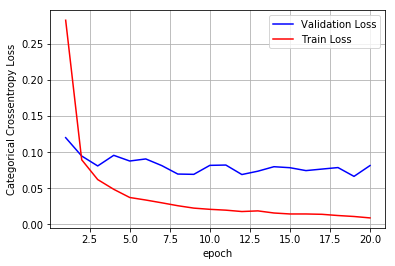

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


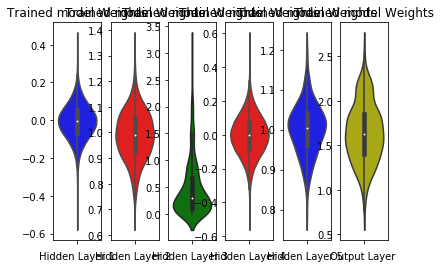

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 5: relu activation with BatchNormalization + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(BatchNormalization())

model_1.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.246, seed=None)))
model_1.add(BatchNormalization())
model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_350 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_93 (Batc (None, 512)               2048      
_________________________________________________________________
dense_351 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_94 (Batc (None, 256)               1024      
_________________________________________________________________
dense_352 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_95 (Batc (None, 128)               512       
_________________________________________________________________
dense_353 (Dense)            (None, 64)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 341us/step - loss: 0.8386 - acc: 0.7594 - val_loss: 0.4028 - val_acc: 0.8928
Epoch 2/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.3508 - acc: 0.9055 - val_loss: 0.2728 - val_acc: 0.9247
Epoch 3/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.2513 - acc: 0.9306 - val_loss: 0.2216 - val_acc: 0.9385
Epoch 4/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.2027 - acc: 0.9429 - val_loss: 0.1915 - val_acc: 0.9449
Epoch 5/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.1697 - acc: 0.9518 - val_loss: 0.1733 - val_acc: 0.9498
Epoch 6/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.1485 - acc: 0.9579 - val_loss: 0.1610 - val_acc: 0.9534
Epoch 7/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.1296 - acc: 0.9633 - val_loss: 0.

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.11425882778484374
Test accuracy: 0.9666


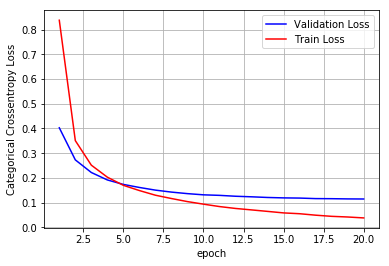

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


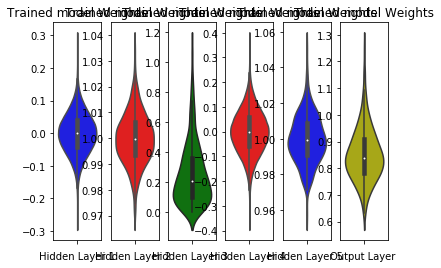

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>__ Model 6: sigmoid activation with Dropout + AdamOptimizer with SGD Weight</h3>

In [0]:
from keras.layers import Dropout

model_1 = Sequential()

model_1.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(256, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(32, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.144, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_356 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_71 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_357 (Dense)            (None, 512)               131584    
_________________________________________________________________
dropout_72 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_358 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_73 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_359 (Dense)            (None, 128)             

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 339us/step - loss: 2.3372 - acc: 0.1035 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 10s 172us/step - loss: 2.0959 - acc: 0.1831 - val_loss: 1.5800 - val_acc: 0.3579
Epoch 3/20
60000/60000 [==============================] - 10s 173us/step - loss: 1.4680 - acc: 0.3686 - val_loss: 1.1738 - val_acc: 0.4790
Epoch 4/20
60000/60000 [==============================] - 10s 171us/step - loss: 1.2212 - acc: 0.4466 - val_loss: 1.0062 - val_acc: 0.4952
Epoch 5/20
60000/60000 [==============================] - 10s 172us/step - loss: 1.1057 - acc: 0.4717 - val_loss: 0.9403 - val_acc: 0.5080
Epoch 6/20
60000/60000 [==============================] - 10s 172us/step - loss: 1.0494 - acc: 0.4777 - val_loss: 0.9066 - val_acc: 0.5083
Epoch 7/20
60000/60000 [==============================] - 10s 174us/step - loss: 1.0124 - acc: 0.4877 - val_loss: 0.

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.2954470875740051
Test accuracy: 0.8802


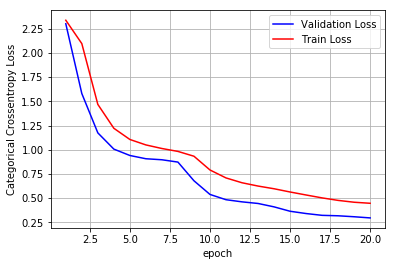

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


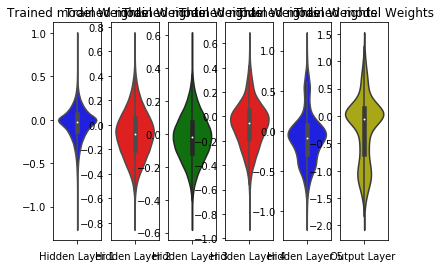

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 6: sigmoid activation with Dropout + GradientDescentOptimizer with SGD Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(256, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(32, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.144, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_363 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_77 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_364 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_78 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_365 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_79 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_366 (Dense)            (None, 64)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 315us/step - loss: 2.4703 - acc: 0.1019 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 9s 144us/step - loss: 2.3927 - acc: 0.1027 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 9s 145us/step - loss: 2.3628 - acc: 0.1034 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 9s 144us/step - loss: 2.3476 - acc: 0.1009 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 9s 144us/step - loss: 2.3369 - acc: 0.0988 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 9s 144us/step - loss: 2.3286 - acc: 0.0999 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 9s 147us/step - loss: 2.3236 - acc: 0.1033 - val_loss: 2.3011 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 2.3010885906219483
Test accuracy: 0.1135


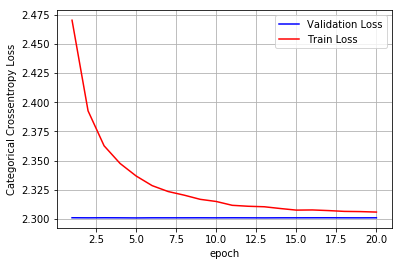

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


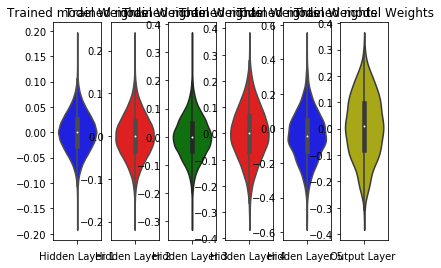

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model 6: sigmoid activation with Dropout + AdamOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(256, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(32, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.246, seed=None)))
model_1.add(Dropout(0.5))


model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_369 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_82 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_370 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_83 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_371 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_84 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_372 (Dense)            (None, 64)              

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 348us/step - loss: 2.0744 - acc: 0.2115 - val_loss: 1.3061 - val_acc: 0.6436
Epoch 2/20
60000/60000 [==============================] - 10s 174us/step - loss: 1.2352 - acc: 0.5555 - val_loss: 0.6935 - val_acc: 0.8672
Epoch 3/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.8730 - acc: 0.7302 - val_loss: 0.4499 - val_acc: 0.9161
Epoch 4/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.7012 - acc: 0.8031 - val_loss: 0.3391 - val_acc: 0.9337
Epoch 5/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.6018 - acc: 0.8397 - val_loss: 0.2778 - val_acc: 0.9450
Epoch 6/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.5321 - acc: 0.8613 - val_loss: 0.2446 - val_acc: 0.9501
Epoch 7/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.4930 - acc: 0.8725 - val_loss: 0.

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.12581829980649054
Test accuracy: 0.9731


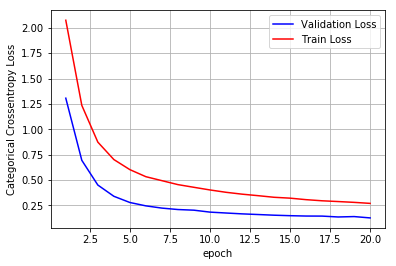

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


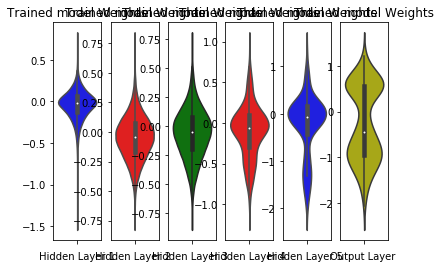

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Model 6: sigmoid activation with Dropout + GrdientDescentOptimizer with Relu Weight</h3>

In [0]:
model_1 = Sequential()

model_1.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(256, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.175, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(32, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.246, seed=None)))
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_375 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_87 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_376 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_88 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_377 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_89 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_378 (Dense)            (None, 64)              

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 326us/step - loss: 2.4863 - acc: 0.1019 - val_loss: 2.3030 - val_acc: 0.0962
Epoch 2/20
60000/60000 [==============================] - 9s 152us/step - loss: 2.4109 - acc: 0.0986 - val_loss: 2.3032 - val_acc: 0.1028
Epoch 3/20
60000/60000 [==============================] - 9s 152us/step - loss: 2.3715 - acc: 0.1015 - val_loss: 2.3029 - val_acc: 0.1190
Epoch 4/20
60000/60000 [==============================] - 9s 149us/step - loss: 2.3520 - acc: 0.1006 - val_loss: 2.3021 - val_acc: 0.1045
Epoch 5/20
60000/60000 [==============================] - 9s 150us/step - loss: 2.3386 - acc: 0.1019 - val_loss: 2.3024 - val_acc: 0.1039
Epoch 6/20
60000/60000 [==============================] - 9s 151us/step - loss: 2.3284 - acc: 0.1035 - val_loss: 2.3017 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 9s 150us/step - loss: 2.3255 - acc: 0.1012 - val_loss: 2.3018 -

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 2.3011954772949217
Test accuracy: 0.1135


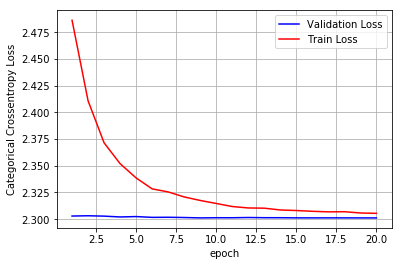

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


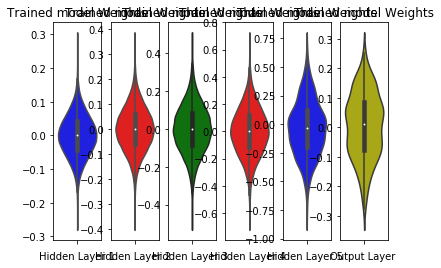

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [0]:
# http://zetcode.com/python/prettytable/ 
 
from prettytable import PrettyTable 
 
x = PrettyTable() 
 
x.field_names = ["Architecture", "Model Name", "Accuracy(%)", "Test Cost"] 

x.add_row(["Architecture 1: 784-501-101-10", "input-sigmoid(501)-sigmoid(101)-sigmoid(output)-AdamOptimizer-SGD Weight", 98.19,	0.07])
x.add_row(["Architecture 1: 784-501-101-10", "input-sigmoid(501)-sigmoid(101)-sigmoid(output)-GradientDescentOptimizer-SGD Weight", 87.68, 0.47])
x.add_row(["Architecture 1: 784-501-101-10", "input-sigmoid(501)-sigmoid(101)-sigmoid(output)-AdamOptimizer-Relu Weight", 97.89, 0.07])
x.add_row(["Architecture 1: 784-501-101-10", "input-sigmoid(501)-sigmoid(101)-sigmoid(output)-GradientDescentOptimizer-Relu Weight", 89.99,	0.38])
x.add_row(["Architecture 1: 784-501-101-10", "input(784)-ReLu(501)-ReLu(101)-sigmoid(output 10)-AdamOptimizer-SGD Weight", 98.09, 0.09])
x.add_row(["Architecture 1: 784-501-101-10", "input(784)-ReLu(501)-ReLu(101)-sigmoid(output 10)-AdamOptimizer-GradientDescentOptimizer-SGD Weight", 95.82,	0.15])
x.add_row(["Architecture 1: 784-501-101-10", "input(784)-ReLu(501)-ReLu(101)-sigmoid(output 10)-AdamOptimizer-AdamOptimizer-Relu Weight", 98.06, 0.1])
x.add_row(["Architecture 1: 784-501-101-10", "input(784)-ReLu(501)-ReLu(101)-sigmoid(output 10)-AdamOptimizer-GradientDescentOptimizer-Relu Weight", 96.35,	0.12])
x.add_row(["Architecture 1: 784-501-101-10", "Input-Sigmoid(BN(501))-Sigmoid(BN(101))-Sigmoid(output)-AdamOptimizer-SGD Weight", 97.82,	0.08])
x.add_row(["Architecture 1: 784-501-101-10", "Input-Sigmoid(BN(501))-Sigmoid(BN(101))-Sigmoid(output))-GradientDescentOptimizer-SGD Weight", 95.55,	0.16])
x.add_row(["Architecture 1: 784-501-101-10", "Input-Sigmoid(BN(501))-Sigmoid(BN(101))-Sigmoid(output)-AdamOptimizer-Relu Weight", 97.8, 0.09])
x.add_row(["Architecture 1: 784-501-101-10", "Input-Sigmoid(BN(501))-Sigmoid(BN(101))-Sigmoid(output)-GradientDescentOptimizer-Relu Weight", 95.31,	0.16])
x.add_row(["Architecture 1: 784-501-101-10", "Input-ReLu(501)-Dropout-ReLu(101)-Dropout-Sigmoid(output)-AdamOptimizer-SGD Weight", 98.15, 0.07])
x.add_row(["Architecture 1: 784-501-101-10", "Input-ReLu(501)-Dropout-ReLu(101)-Dropout-Sigmoid(output)-GradientDescentOptimizer-SGD Weight", 95.12, 0.17])
x.add_row(["Architecture 1: 784-501-101-10", "Input-ReLu(501)-Dropout-ReLu(101)-Dropout-Sigmoid(output)-AdamOptimizer-Relu Weight", 98.27, 0.07])
x.add_row(["Architecture 1: 784-501-101-10", "Input-ReLu(501)-Dropout-ReLu(101)-Dropout-Sigmoid(output)-GradientDescentOptimizer-Relu Weight", 68.01, 1.29])
x.add_row(["Architecture 1: 784-501-101-10", "Input-Relu(BN(501))-Relu(BN(101))-sigmoid(output)-AdamOptimizer-SGD Weight", 98.1, 0.08]) 
x.add_row(["Architecture 1: 784-501-101-10", "Input-Relu(BN(501))-Relu(BN(101))-sigmoid(output)-GradientDescentOptimizer-SGD Weight", 97.42, 0.08])
x.add_row(["Architecture 1: 784-501-101-10", "Input-Relu(BN(501))-Relu(BN(101))-sigmoid(output)-AdamOptimizer-Relu Weight", 98.14, 0.08])
x.add_row(["Architecture 1: 784-501-101-10", "Input-Relu(BN(501))-Relu(BN(101))-sigmoid(output)-GradientDescentOptimizer-Relu Weight", 96.79, 0.1])
x.add_row(["Architecture 1: 784-501-101-10", "Input-sigmoid(501)-Dropout-sigmoid(101)-Dropout-sigmoid(output)-AdamOptimizer-SGD Weight", 97.99,	0.07]) 
x.add_row(["Architecture 1: 784-501-101-10", "Input-sigmoid(501)-Dropout-sigmoid(101)-Dropout-sigmoid(output)-GradientDescentOptimizer-SGD Weight", 78.99, 0.78])
x.add_row(["Architecture 1: 784-501-101-10", "Input-sigmoid(501)-Dropout-sigmoid(101)-Dropout-sigmoid(output)-AdamOptimizer-Relu Weight", 97.92, 0.07])
x.add_row(["Architecture 1: 784-501-101-10", "Input-sigmoid(501)-Dropout-sigmoid(101)-Dropout-sigmoid(output)-GradientDescentOptimizer-Relu Weight", 82.26,	0.63])
print(x) 

+--------------------------------+------------------------------------------------------------------------------------------------------+-------------+-----------+
|          Architecture          |                                              Model Name                                              | Accuracy(%) | Test Cost |
+--------------------------------+------------------------------------------------------------------------------------------------------+-------------+-----------+
| Architecture 1: 784-501-101-10 |               input-sigmoid(501)-sigmoid(101)-sigmoid(output)-AdamOptimizer-SGD Weight               |    98.19    |    0.07   |
| Architecture 1: 784-501-101-10 |         input-sigmoid(501)-sigmoid(101)-sigmoid(output)-GradientDescentOptimizer-SGD Weight          |    87.68    |    0.47   |
| Architecture 1: 784-501-101-10 |              input-sigmoid(501)-sigmoid(101)-sigmoid(output)-AdamOptimizer-Relu Weight               |    97.89    |    0.07   |
| Architecture 1

In [0]:
# http://zetcode.com/python/prettytable/ 
 
from prettytable import PrettyTable 
 
x = PrettyTable() 
 
x.field_names = ["Architecture", "Model Name", "Accuracy(%)", "Test Cost"] 

x.add_row(["Architecture 2: 784-256-128-64-10", "input-sigmoid(256)-sigmoid(128)-sigmoid(64)-sigmoid(output)-AdamOptimizer-SGD Weight", 97.86, 0.09,])
x.add_row(["Architecture 2: 784-256-128-64-10", "input-sigmoid(256)-sigmoid(128)-sigmoid(64)-sigmoid(output)-GradientDescentOptimizer-SGD Weight", 62.01, 1.23])
x.add_row(["Architecture 2: 784-256-128-64-10", "input-sigmoid(256)-sigmoid(128)-sigmoid(64)-sigmoid(output)-AdamOptimizer-Relu Weight", 97.71,	0.09])
x.add_row(["Architecture 2: 784-256-128-64-10", "input-sigmoid(256)-sigmoid(128)-sigmoid(64)-sigmoid(output)-GradientDescentOptimizer-Relu Weig ht", 83.42,	0.67])
x.add_row(["Architecture 2: 784-256-128-64-10", "input-ReLu(256)-ReLu(128)-ReLu(64)-sigmoid(output)-AdamOptimizer-SGD Weight", 97.88, 0.1])
x.add_row(["Architecture 2: 784-256-128-64-10", "input-ReLu(256)-ReLu(128)-ReLu(64)-sigmoid(output)-AdamOptimizer-GradientDescentOptimizer-SGD Weight", 96.12, 0.13])
x.add_row(["Architecture 2: 784-256-128-64-10", "input-ReLu(256)-ReLu(128)-ReLu(64)-sigmoid(output)-AdamOptimizer-AdamOptimizer-Relu Weight", 97.99, 0.1])
x.add_row(["Architecture 2: 784-256-128-64-10", "input-ReLu(256)-ReLu(128)-ReLu(64)-sigmoid(output)-AdamOptimizer-GradientDescentOptimizer-Relu Weight", 96.17,	0.13])
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-Sigmoid(BN(256))-Sigmoid(BN(128))-Sigmoid(BN(64))-Sigmoid(output)-AdamOptimizer-SGD Weight", 97.86, 0.09])
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-Sigmoid(BN(256))-Sigmoid(BN(128))-Sigmoid(BN(64))-Sigmoid(output))-GradientDescentOptimizer-SGD Weight", 95.98, 0.14])
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-Sigmoid(BN(256))-Sigmoid(BN(128))-Sigmoid(BN(64))-Sigmoid(output)-AdamOptimizer-Relu Weight", 97.85,	0.1])
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-Sigmoid(BN(256))-Sigmoid(BN(128))-Sigmoid(BN(64))-Sigmoid(output)-GradientDescentOptimizer-Relu Weight", 95.24, 0.16])
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-ReLu(256)-Dropout-ReLu(128)-Dropout-ReLu(64)-Dropout-Sigmoid(output)-AdamOptimizer-SGD Weight", 97.87, 0.09])
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-ReLu(256)-Dropout-ReLu(128)-Dropout-ReLu(64)-Dropout-Sigmoid(output)-GradientDescentOptimizer-SGD Weight", 94.89, 0.18])
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-ReLu(256)-Dropout-ReLu(128)-Dropout-ReLu(64)-Dropout-Sigmoid(output)-AdamOptimizer-Relu Weight", 97.58,	0.1])
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-ReLu(256)-Dropout-ReLu(128)-Dropout-ReLu(64)-Dropout-Sigmoid(output)-GradientDescentOptimizer-Relu Weight", 11.35, 2.35])
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-Relu(BN(256))-Relu(BN(128))-Relu(BN(64))-Sigmoid(output)-AdamOptimizer-SGD Weight", 98.08, 0.08]) 
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-Relu(BN(256))-Relu(BN(128))-Relu(BN(64))-Sigmoid(output)-GradientDescentOptimizer-SGD Weight", 97.49, 0.09])
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-Relu(BN(256))-Relu(BN(128))-Relu(BN(64))-Sigmoid(output)-AdamOptimizer-Relu Weight", 97.81, 0.09])
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-Relu(BN(256))-Relu(BN(128))-Relu(BN(64))-Sigmoid(output)-GradientDescentOptimizer-Relu Weight", 96.05, 0.13])
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-ReLu(256)-Sigmoid(128)-Dropout-Sigmoid(64)-Dropout-Sigmoid(output)-AdamOptimizer-SGD Weight", 97.5,	0.09]) 
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-ReLu(256)-Sigmoid(128)-Dropout-Sigmoid(64)-Dropout-Sigmoid(output)-GradientDescentOptimizer-SGD Weight", 14.97, 2.28])
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-ReLu(256)-Sigmoid(128)-Dropout-Sigmoid(64)-Dropout-Sigmoid(output)-AdamOptimizer-Relu Weight", 97.33, 0.1])
x.add_row(["Architecture 2: 784-256-128-64-10", "Input-ReLu(256)-Sigmoid(128)-Dropout-Sigmoid(64)-Dropout-Sigmoid(output)-GradientDescentOptimizer-Relu Weight", 46.08,	1.94])
print(x) 

+-----------------------------------+-----------------------------------------------------------------------------------------------------------------+-------------+-----------+
|            Architecture           |                                                    Model Name                                                   | Accuracy(%) | Test Cost |
+-----------------------------------+-----------------------------------------------------------------------------------------------------------------+-------------+-----------+
| Architecture 2: 784-256-128-64-10 |               input-sigmoid(256)-sigmoid(128)-sigmoid(64)-sigmoid(output)-AdamOptimizer-SGD Weight              |    97.86    |    0.09   |
| Architecture 2: 784-256-128-64-10 |         input-sigmoid(256)-sigmoid(128)-sigmoid(64)-sigmoid(output)-GradientDescentOptimizer-SGD Weight         |    62.01    |    1.23   |
| Architecture 2: 784-256-128-64-10 |              input-sigmoid(256)-sigmoid(128)-sigmoid(64)-sigmoid(output)

In [0]:
# http://zetcode.com/python/prettytable/ 
 
from prettytable import PrettyTable 
 
x = PrettyTable() 
 
x.field_names = ["Architecture", "Model Name", "Accuracy(%)", "Test Cost"] 

x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "input-sigmoid(512)-sigmoid(256)-sigmoid(128)-sigmoid(64)-sigmoid(32)-sigmoid(output)-AdamOptimizer-SGD Weight", 97.91, 0.1])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "input-sigmoid(512)-sigmoid(256)-sigmoid(128)-sigmoid(64)-sigmoid(32)-sigmoid(output)-GradientDescentOptimizer-SGD Weight", 11.35, 2.30])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "input-sigmoid(512)-sigmoid(256)-sigmoid(128)-sigmoid(64)-sigmoid(32)-sigmoid(output)-AdamOptimizer-Relu Weight", 98.05,	0.09])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "input-sigmoid(512)-sigmoid(256)-sigmoid(128)-sigmoid(64)-sigmoid(32)-sigmoid(output)-GradientDescentOptimizer-Relu Weig ht", 18.3, 2.26])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "input-ReLu(512)-ReLu(256)-ReLu(128)-ReLu(64)-ReLu(32)-sigmoid(output)-AdamOptimizer-SGD Weight", 98.08,	0.09])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "input-ReLu(512)-ReLu(256)-ReLu(128)-ReLu(64)-ReLu(32)-sigmoid(output)-AdamOptimizer-GradientDescentOptimizer-SGD Weight", 96.98, 0.1])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "input-ReLu(512)-ReLu(256)-ReLu(128)-ReLu(64)-ReLu(32)-sigmoid(output)-AdamOptimizer-AdamOptimizer-Relu Weight", 98.32, 0.08])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "input-ReLu(512)-ReLu(256)-ReLu(128)-ReLu(64)-ReLu(32)-sigmoid(output)-AdamOptimizer-GradientDescentOptimizer-Relu Weight", 96.81, 0.1])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-Sigmoid(BN(512))-Sigmoid(BN(256))-Sigmoid(BN(128))-Sigmoid(BN(64))-Sigmoid(BN(32))-Sigmoid(output)-AdamOptimizer-SGD Weight", 98.07, 0.08])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-Sigmoid(BN(512))-Sigmoid(BN(256))-Sigmoid(BN(128))-Sigmoid(BN(64))-Sigmoid(BN(32))-Sigmoid(output))-GradientDescentOptimizer-SGD Weight", 97.24, 0.09])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-Sigmoid(BN(512))-Sigmoid(BN(256))-Sigmoid(BN(128))-Sigmoid(BN(64))-Sigmoid(BN(32))-Sigmoid(output)-AdamOptimizer-Relu Weight", 97.68,	0.09])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-Sigmoid(BN(512))-Sigmoid(BN(256))-Sigmoid(BN(128))-Sigmoid(BN(64))-Sigmoid(BN(32))-Sigmoid(output)-GradientDescentOptimizer-Relu Weight", 96.36, 0.12])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-ReLu(512)-Dropout-ReLu(256)-Dropout-ReLu(128)-Dropout-ReLu(64)-Dropout-ReLu(32)-Dropout-Sigmoid(output)-AdamOptimizer-SGD Weight", 97.73,	0.12])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-ReLu(512)-Dropout-ReLu(256)-Dropout-ReLu(128)-Dropout-ReLu(64)-Dropout-ReLu(32)-Dropout-Sigmoid(output)-GradientDescentOptimizer-SGD Weight", 92.87,	0.34])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-ReLu(512)-Dropout-ReLu(256)-Dropout-ReLu(128)-Dropout-ReLu(64)-Dropout-ReLu(32)-Dropout-Sigmoid(output)-AdamOptimizer-Relu Weight", 97.13, 0.15])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-ReLu(512)-Dropout-ReLu(256)-Dropout-ReLu(128)-Dropout-ReLu(64)-Dropout-ReLu(32)-Dropout-Sigmoid(output)-GradientDescentOptimizer-Relu Weight", 9.82, 2.66])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-Relu(BN(512))-Relu(BN(256))-Relu(BN(128))-Relu(BN(64))-Relu(BN(32))-Sigmoid(output)-AdamOptimizer-SGD Weight", 98.23,	0.07]) 
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-Relu(BN(512))-Relu(BN(256))-Relu(BN(128))-Relu(BN(64))-Relu(BN(32))-Sigmoid(output)-GradientDescentOptimizer-SGD Weight", 97.17, 0.09])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-Relu(BN(512))-Relu(BN(256))-Relu(BN(128))-Relu(BN(64))-Relu(BN(32))-Sigmoid(output)-AdamOptimizer-Relu Weight", 98.05, 0.08])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-Relu(BN(512))-Relu(BN(256))-Relu(BN(128))-Relu(BN(64))-Relu(BN(32))-Sigmoid(output)-GradientDescentOptimizer-Relu Weight", 96.66,	0.11])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-Sigmoid(512)-Dropout-Sigmoid(256)-Sigmoid(128)-Dropout-Sigmoid(64)-Dropout-Sigmoid(32)-Dropout-Sigmoid(output)-AdamOptimizer-SGD Weight", 88.02, 0.3]) 
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-Sigmoid(512)-Dropout-Sigmoid(256)-Sigmoid(128)-Dropout-Sigmoid(64)-Dropout-Sigmoid(32)-Dropout-Sigmoid(output)-GradientDescentOptimizer-SGD Weight", 11.35, 2.30])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-Sigmoid(512)-Dropout-Sigmoid(256)-Sigmoid(128)-Dropout-Sigmoid(64)-Dropout-Sigmoid(32)-Dropout-Sigmoid(output)-AdamOptimizer-Relu Weight", 97.31,	0.13])
x.add_row(["Architecture 3: 784-512-256-128-64-32-10", "Input-Sigmoid(512)-Dropout-Sigmoid(256)-Sigmoid(128)-Dropout-Sigmoid(64)-Dropout-Sigmoid(32)-Dropout-Sigmoid(output)-GradientDescentOptimizer-Relu Weight", 11.35, 2.30])
print(x) 

+------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+-----------+
|               Architecture               |                                                                         Model Name                                                                        | Accuracy(%) | Test Cost |
+------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+-----------+
| Architecture 3: 784-512-256-128-64-32-10 |                       input-sigmoid(512)-sigmoid(256)-sigmoid(128)-sigmoid(64)-sigmoid(32)-sigmoid(output)-AdamOptimizer-SGD Weight                       |    97.91    |    0.1    |
| Architecture 3: 784-512-256-128-64-32-10 |                  input-sigmoid(512)-sigmoid(256